# HECATE-DS

Harvesting loCAl specTra with Exoplanets (Doppler Shadow)

I will run the modular components of the tool, including two main modules:

1. Extraction
2. Analysis

I will also add a class just for plots, a class to compute CCFs and a class to run SOAP.

this way, when the user wants to extract the local spectra, the code will fetch the auxiliar functions, but at the same time the user can run the CCFs and SOAP separately.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import os
import glob

In [2]:
stellar_params = {
                "Teff":4969, "Teff_err":43,   #effective temperature [K]
                "logg":4.60, "logg_err":0.01, #superficial gravity [dex]
                "FeH":-0.07, "FeH_err":0.02,  #metallicity [dex]
                "P_rot":2.21857312,           #rotation period [d]
                "R_star":0.766,               #radius [solar radii]
                "inc_star":71.87              #stellar inclination [º]
                }

planet_params = {
                "P_orb":2.21857312,           #orbital period [d]
                "a_R":8.76863,                #system scale [stellar radii]
                "Rp_Rs":0.1602,               #planet-to-star radius ratio 
                "t0":53988.30339,             #mid-transit time [d]
                "e":0,                        #orbital eccentricity
                "w":90,                       #argument of periastron [º]
                "inc_planet":85.465,          #planet inclination [º]
                "lbda":-1.00,                 #spin-orbit angle [º]
                "dfp": -0.002424              #mid-transit phase shift
                }

In [3]:
2*np.pi*(0.766*6.96340*10**8)/(2.2185*24*60*60)/1000

17.484644460251637

# White light CCF

/home/telmo/phd_seminar/utils.py:76: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(1 - b**2 - (a_R*np.sin(2*np.pi*np.abs(phases)))**2)


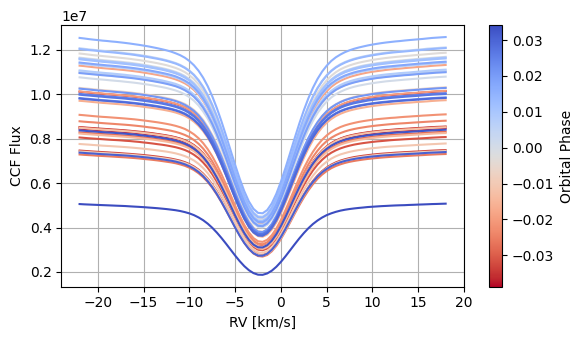

In [4]:
from get_data import *

CCFs, time, airmass, berv, bervmax, snr, list_ccfs = get_CCFs(planet_params)

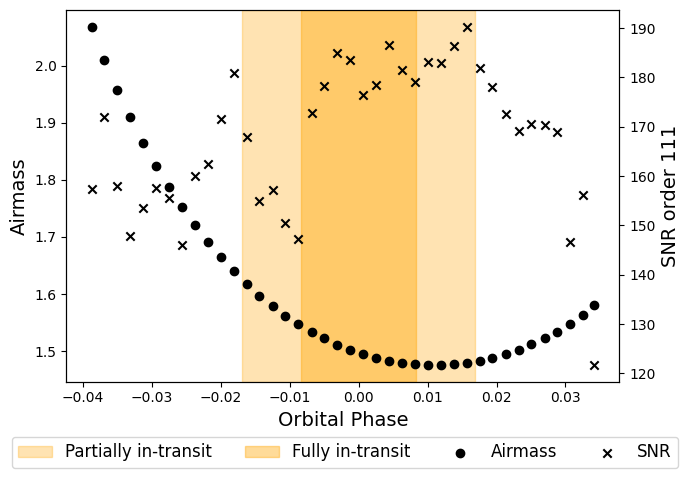

In [5]:
plot_air_snr(planet_params, time, airmass, snr)

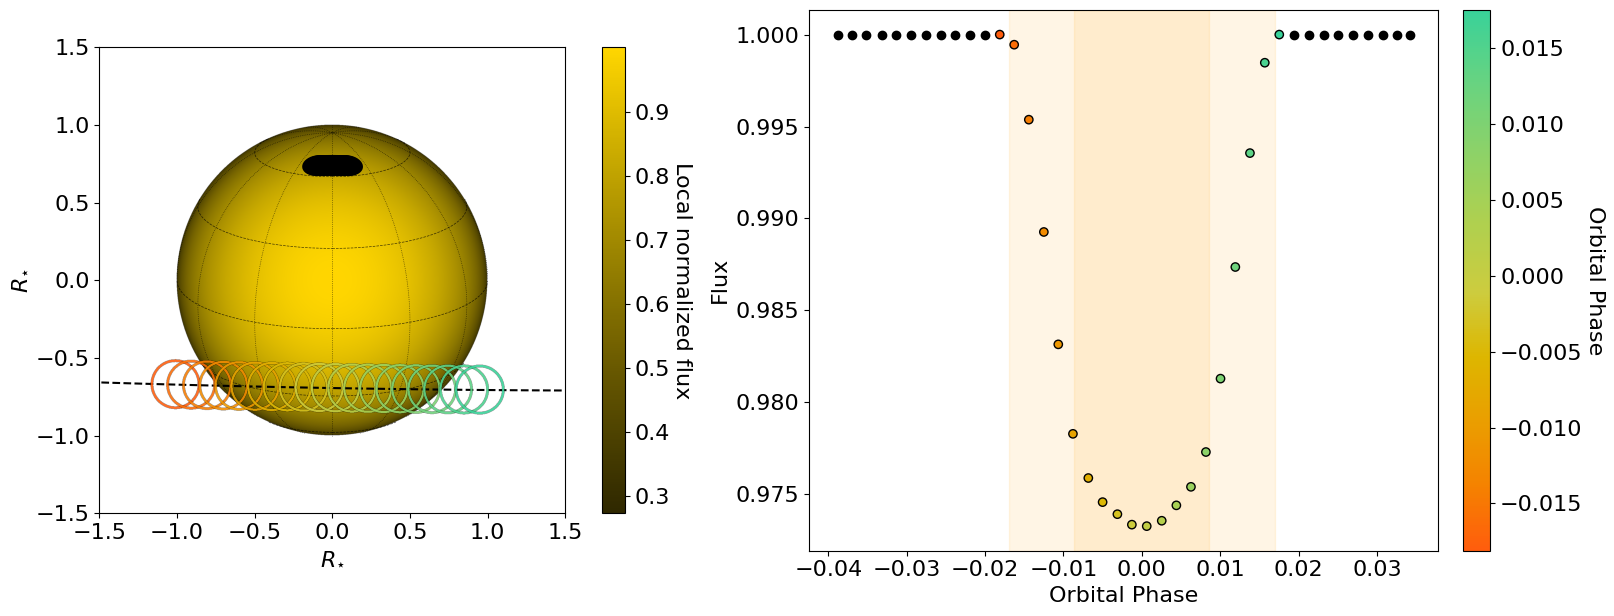

In [6]:
from run_SOAP import run_SOAP

Flux_SOAP = run_SOAP(time, stellar_params, planet_params, plot=True).flux

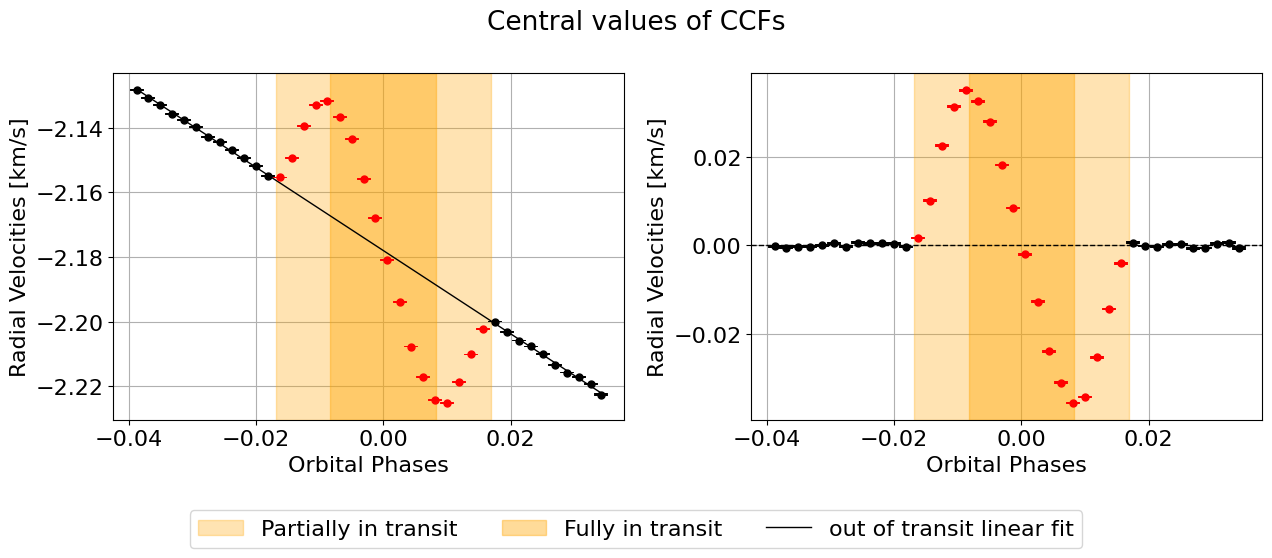

In [7]:
from RM_correction import RM_correction
rm_corr = RM_correction(planet_params, time, CCFs, model="modified Gaussian", plot_fits=False, plot_rm=True)

CCFs_RM_corr = rm_corr.CCFs_RM_corr
x0_corr = rm_corr.x0_corr

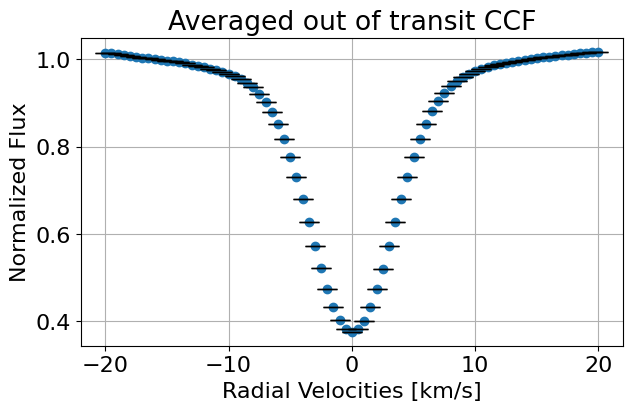

In [8]:
from HECATE_DS import HECATE

hecate = HECATE(planet_params, stellar_params, time, CCFs_RM_corr)

RV_reference = np.arange(-20,20.5,0.5)

CCF_interp, avg_out_of_transit_CCF = hecate._avg_out_of_transit_CCF(CCFs_RM_corr, RV_reference, plot=True, save=None)

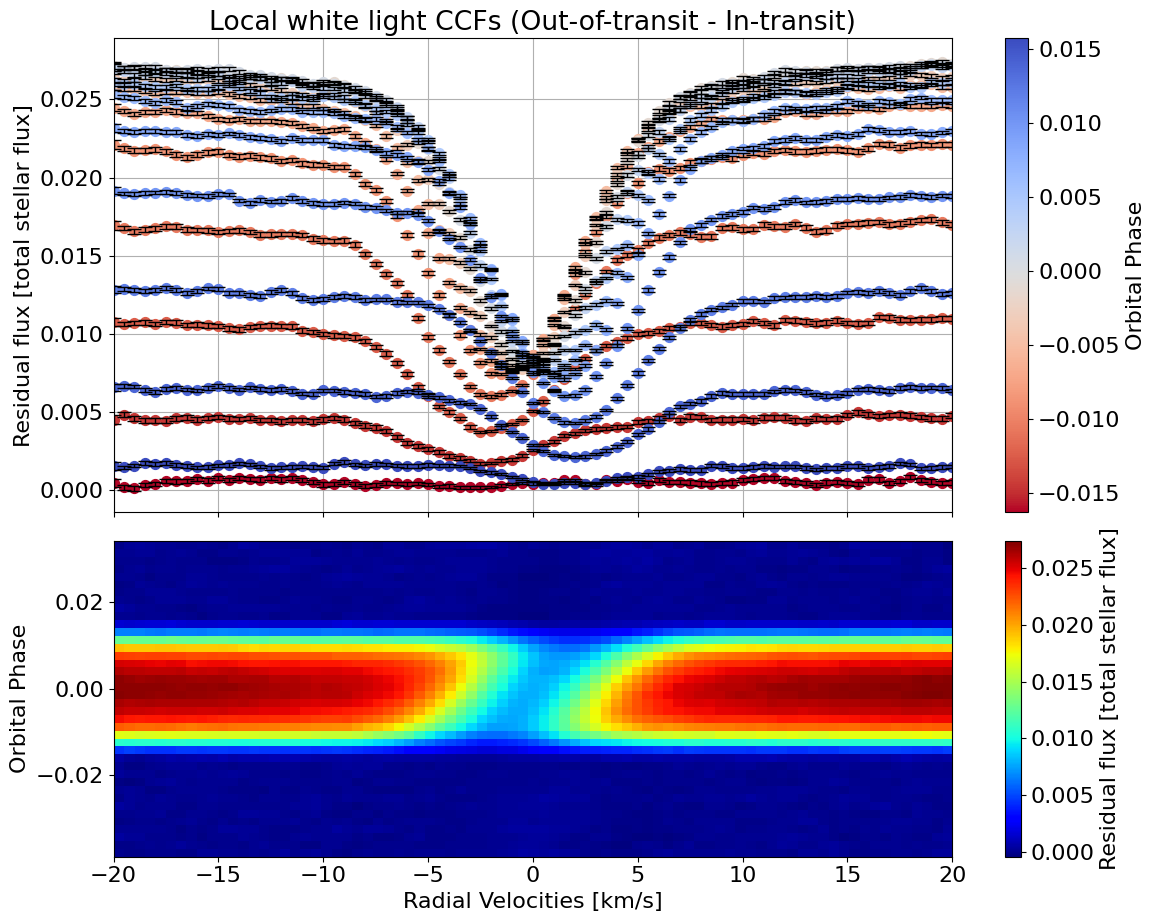

In [9]:
RV_reference = np.arange(-20,20.5,0.5)

plot = {"SOAP":False, "fits_initial_CCF":False, "RM":False, "avg_out_of_transit_CCF":False, "local_CCFs":True}

ccf_type = "white light"
model_fit = "modified Gaussian"

local_CCFs, CCFs_sub_all, CCFs_flux_corr, phases, in_phases = hecate._extract_local_CCF(RV_reference, model_fit, ccf_type, plot, save=None)

In [10]:
central_rv_array, continuum_array, depth_array, width_array, R2_array = hecate._CCF_parameters(CCFs=avg_out_of_transit_CCF, ccf_type="master", model="modified Gaussian", print_output=True, plot_fit=False, save=None)

##############################
FITTING modified Gaussian model TO master CCF
------------------------------
Fit parameters:
y0 = 0.999704 ± 0.000005
x0 = -0.000287 ± 0.000049
sigma = 3.404517 ± 0.000090
a = 0.629535 ± 0.000011
c = 1.823612 ± 0.000085
R^2:  0.9983
------------------------------
CCF parameters:
Central RV [km/s]: -0.000287 ± 0.000049
Continuum: 0.999704 ± 0.000005
Deph [%]: 37.027856 ± 0.001098
Width [km/s]: 3.404517 ± 0.000090


##############################
FITTING modified Gaussian model TO local CCF
Phase: -0.016
------------------------------
Fit parameters:
y0 = 0.000541 ± 0.000019
x0 = -3.256676 ± 0.301677
sigma = 1.854811 ± 0.664221
a = 0.000388 ± 0.000078
c = 1.500583 ± 0.656060
R^2:  0.3435
------------------------------
CCF parameters:
Central RV [km/s]: -3.256676 ± 0.301677
Continuum: 0.000541 ± 0.000019
Deph [%]: 28.230390 ± 14.722646
Width [km/s]: 1.854811 ± 0.664221


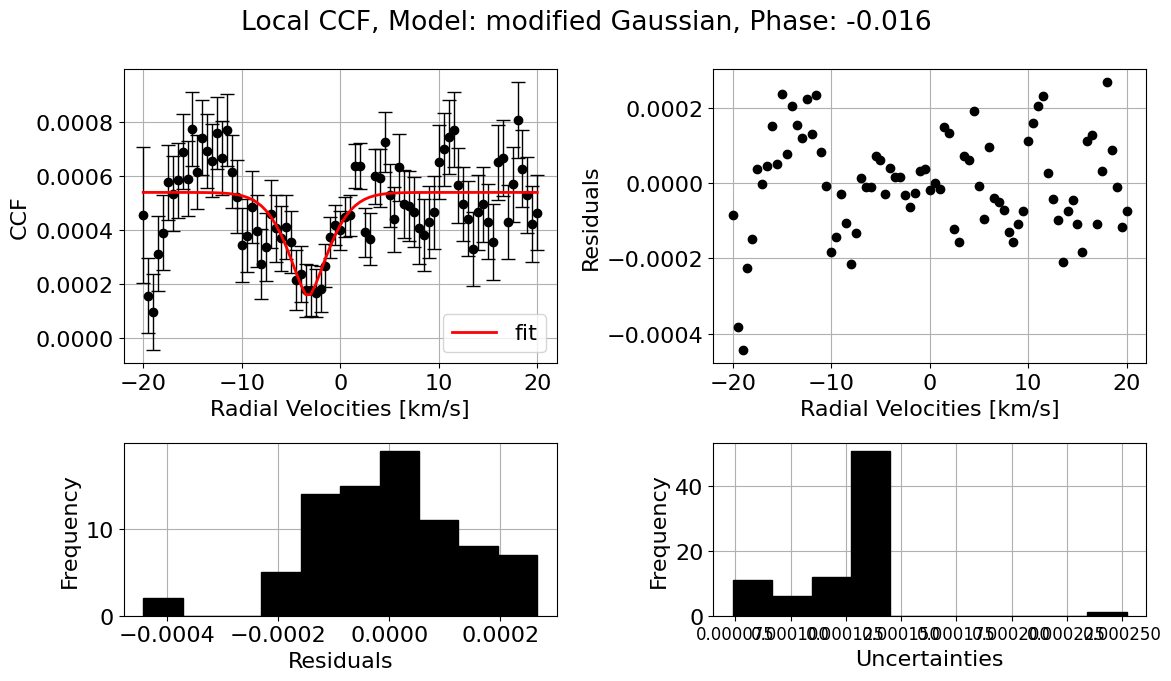

##############################
FITTING modified Gaussian model TO local CCF
Phase: -0.014
------------------------------
Fit parameters:
y0 = 0.004603 ± 0.000023
x0 = -2.359310 ± 0.049904
sigma = 2.905230 ± 0.094938
a = 0.002926 ± 0.000060
c = 1.785617 ± 0.094957
R^2:  0.9811
------------------------------
CCF parameters:
Central RV [km/s]: -2.359310 ± 0.049904
Continuum: 0.004603 ± 0.000023
Deph [%]: 36.436729 ± 1.350009
Width [km/s]: 2.905230 ± 0.094938


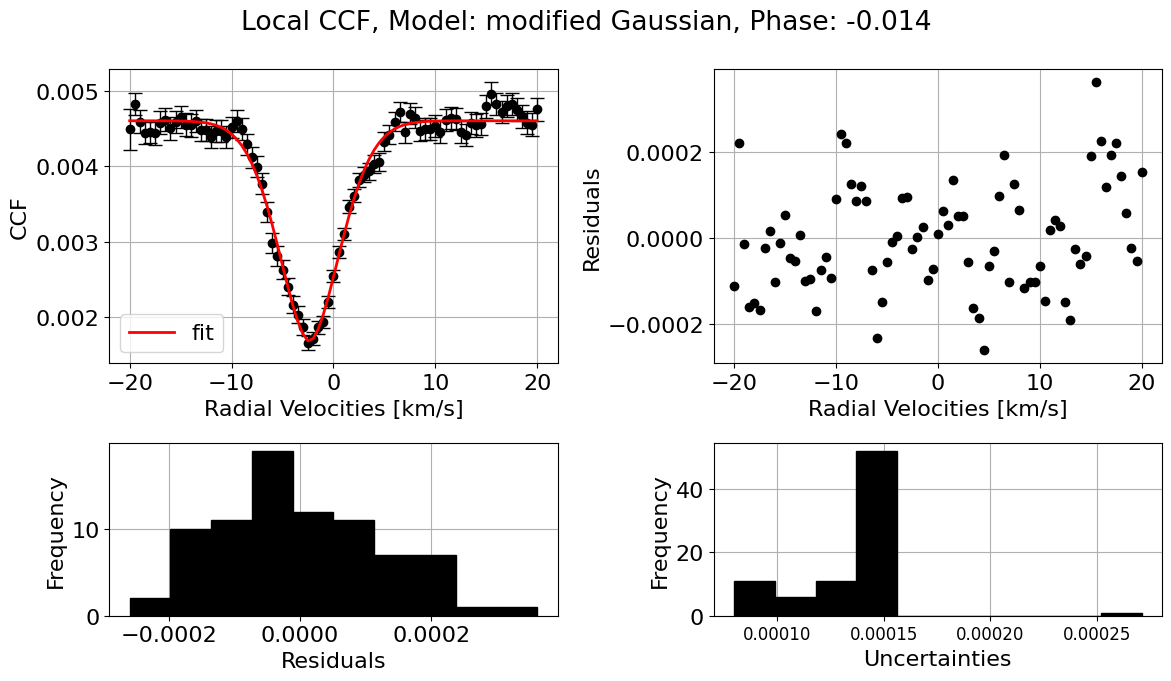

##############################
FITTING modified Gaussian model TO local CCF
Phase: -0.012
------------------------------
Fit parameters:
y0 = 0.010663 ± 0.000022
x0 = -2.106240 ± 0.020632
sigma = 3.135276 ± 0.037457
a = 0.006950 ± 0.000054
c = 1.924682 ± 0.041253
R^2:  0.9942
------------------------------
CCF parameters:
Central RV [km/s]: -2.106240 ± 0.020632
Continuum: 0.010663 ± 0.000022
Deph [%]: 34.819137 ± 0.528396
Width [km/s]: 3.135276 ± 0.037457


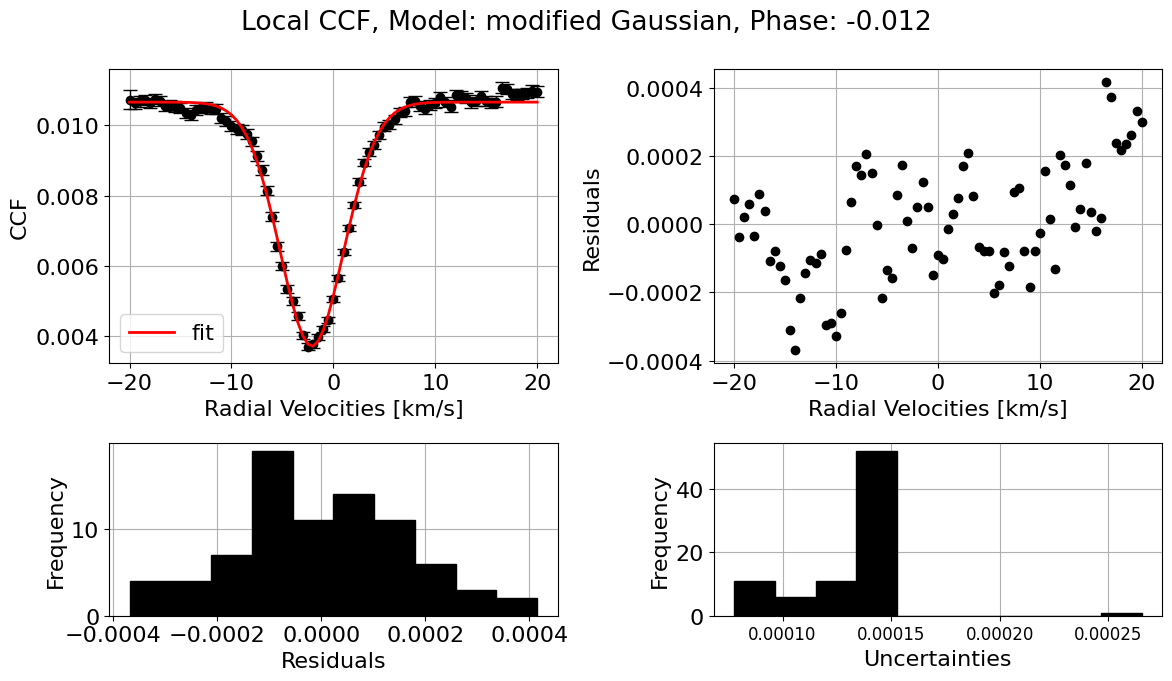

##############################
FITTING modified Gaussian model TO local CCF
Phase: -0.010
------------------------------
Fit parameters:
y0 = 0.016758 ± 0.000023
x0 = -1.817711 ± 0.013621
sigma = 3.204594 ± 0.024306
a = 0.010853 ± 0.000054
c = 1.978738 ± 0.027980
R^2:  0.9959
------------------------------
CCF parameters:
Central RV [km/s]: -1.817711 ± 0.013621
Continuum: 0.016758 ± 0.000023
Deph [%]: 35.236951 ± 0.336613
Width [km/s]: 3.204594 ± 0.024306


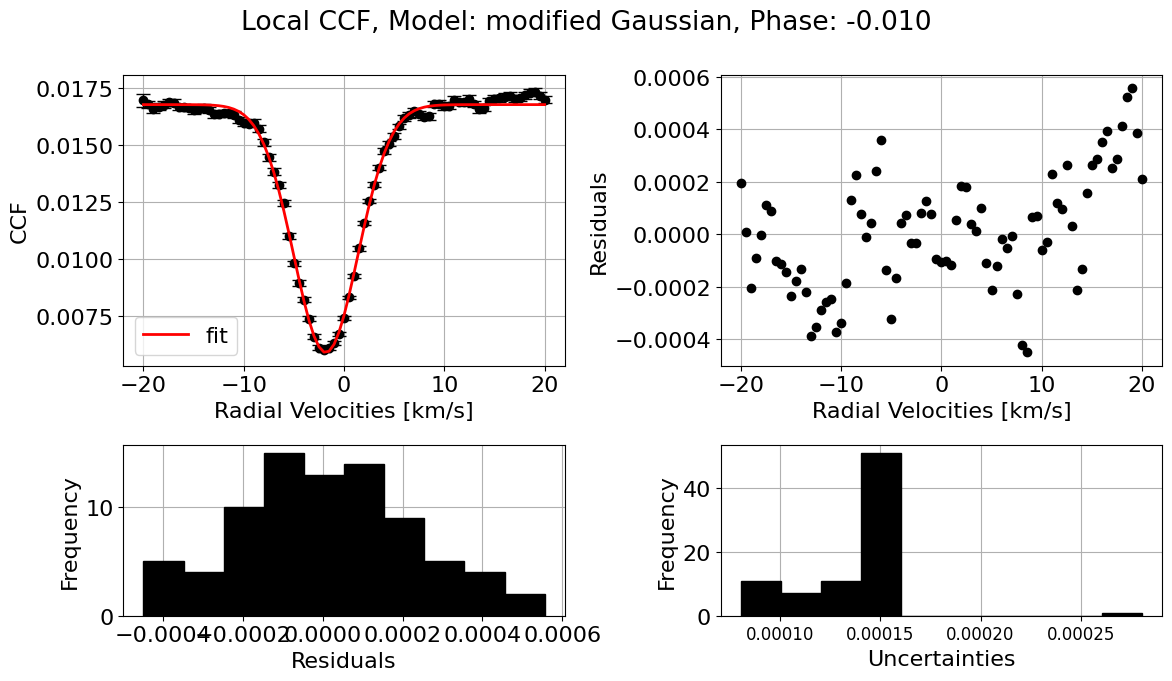

##############################
FITTING modified Gaussian model TO local CCF
Phase: -0.008
------------------------------
Fit parameters:
y0 = 0.021612 ± 0.000023
x0 = -1.469780 ± 0.010364
sigma = 3.149503 ± 0.018657
a = 0.014391 ± 0.000055
c = 1.928955 ± 0.020775
R^2:  0.9968
------------------------------
CCF parameters:
Central RV [km/s]: -1.469780 ± 0.010364
Continuum: 0.021612 ± 0.000023
Deph [%]: 33.411912 ± 0.265148
Width [km/s]: 3.149503 ± 0.018657


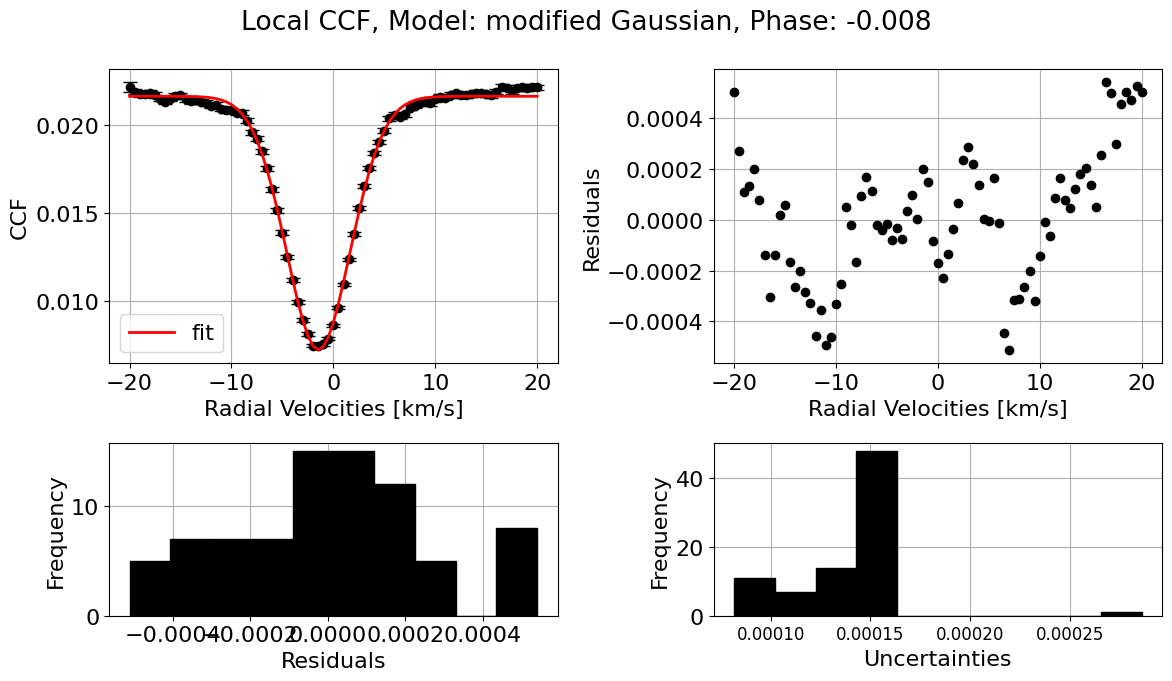

##############################
FITTING modified Gaussian model TO local CCF
Phase: -0.006
------------------------------
Fit parameters:
y0 = 0.024036 ± 0.000020
x0 = -1.142606 ± 0.007500
sigma = 3.070752 ± 0.013645
a = 0.016576 ± 0.000047
c = 1.890140 ± 0.015029
R^2:  0.9966
------------------------------
CCF parameters:
Central RV [km/s]: -1.142606 ± 0.007500
Continuum: 0.024036 ± 0.000020
Deph [%]: 31.036756 ± 0.202881
Width [km/s]: 3.070752 ± 0.013645


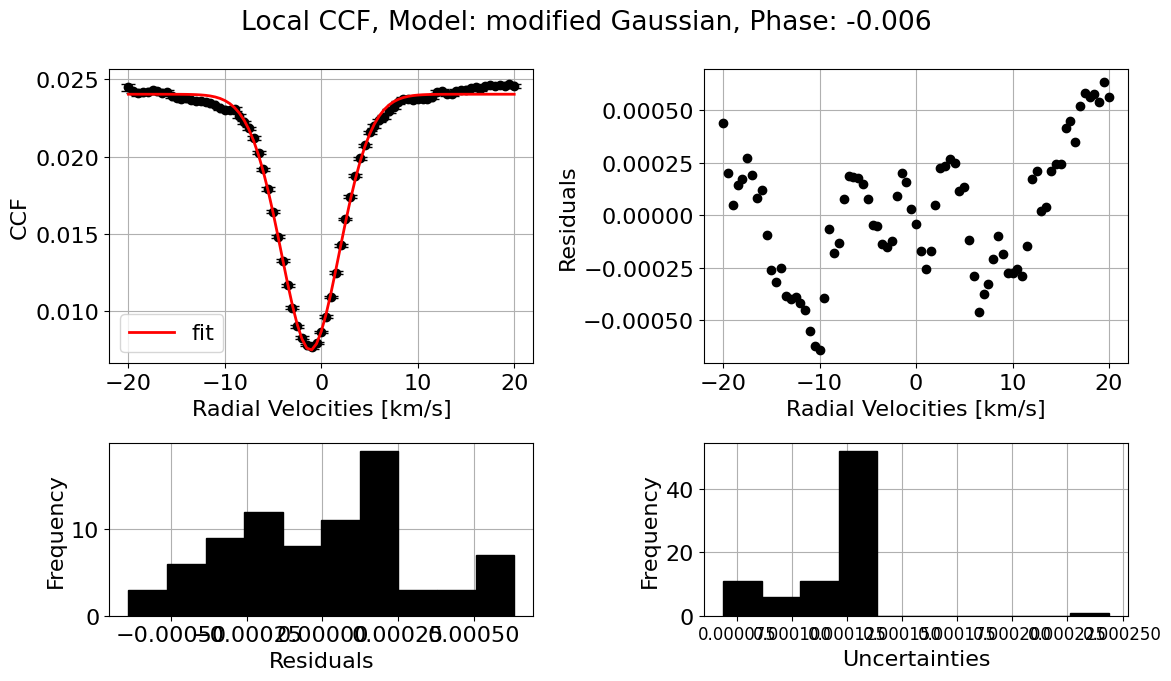

##############################
FITTING modified Gaussian model TO local CCF
Phase: -0.005
------------------------------
Fit parameters:
y0 = 0.025374 ± 0.000019
x0 = -0.880725 ± 0.006589
sigma = 3.029615 ± 0.011918
a = 0.017836 ± 0.000044
c = 1.905842 ± 0.013594
R^2:  0.997
------------------------------
CCF parameters:
Central RV [km/s]: -0.880725 ± 0.006589
Continuum: 0.025374 ± 0.000019
Deph [%]: 29.707790 ± 0.183087
Width [km/s]: 3.029615 ± 0.011918


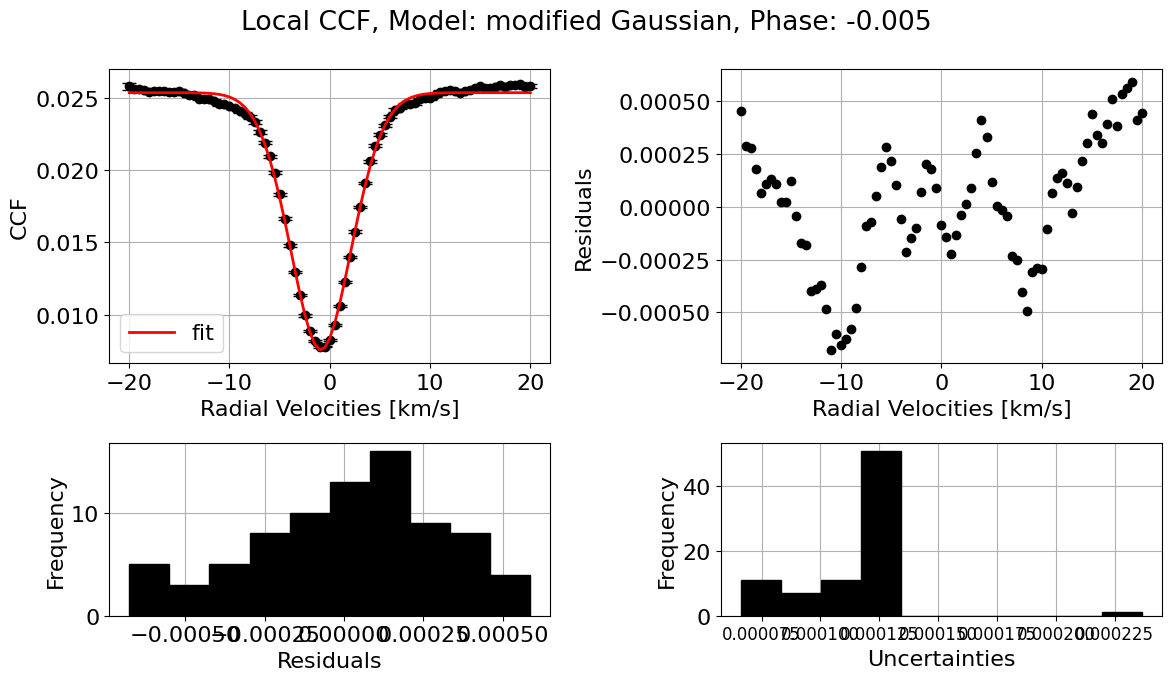

##############################
FITTING modified Gaussian model TO local CCF
Phase: -0.003
------------------------------
Fit parameters:
y0 = 0.026042 ± 0.000018
x0 = -0.546295 ± 0.006111
sigma = 3.001415 ± 0.011137
a = 0.018446 ± 0.000043
c = 1.877028 ± 0.012429
R^2:  0.9974
------------------------------
CCF parameters:
Central RV [km/s]: -0.546295 ± 0.006111
Continuum: 0.026042 ± 0.000018
Deph [%]: 29.169435 ± 0.172208
Width [km/s]: 3.001415 ± 0.011137


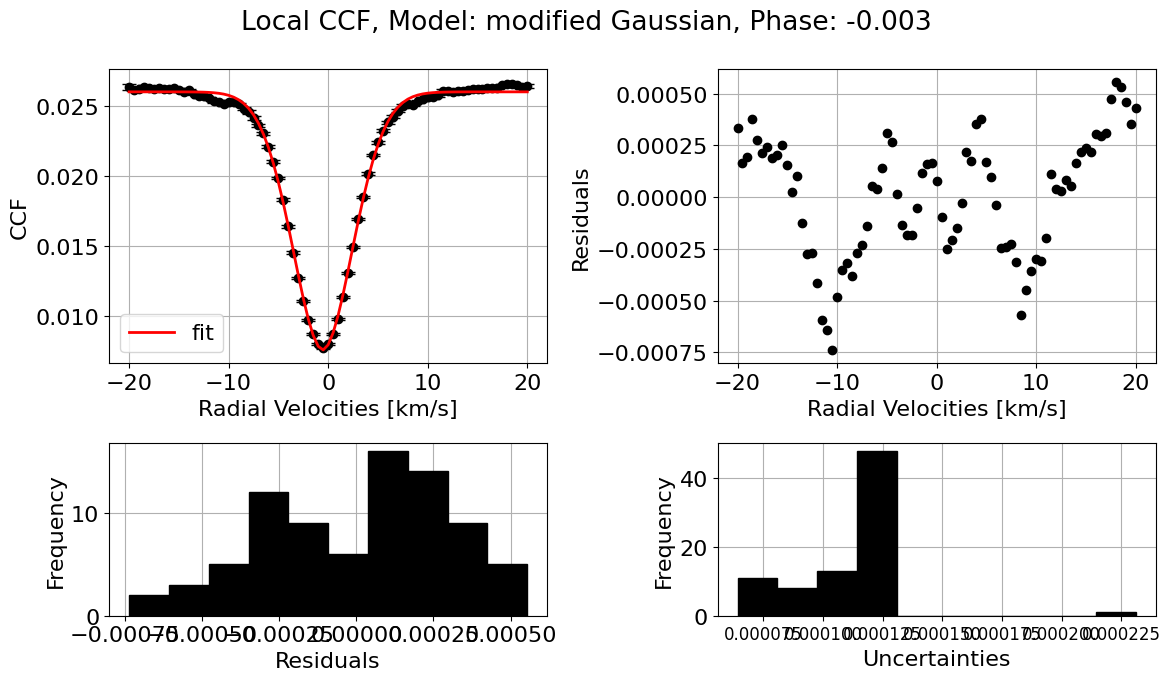

##############################
FITTING modified Gaussian model TO local CCF
Phase: -0.001
------------------------------
Fit parameters:
y0 = 0.026651 ± 0.000018
x0 = -0.244257 ± 0.005937
sigma = 3.037789 ± 0.010664
a = 0.018946 ± 0.000042
c = 1.931503 ± 0.012526
R^2:  0.9972
------------------------------
CCF parameters:
Central RV [km/s]: -0.244257 ± 0.005937
Continuum: 0.026651 ± 0.000018
Deph [%]: 28.909699 ± 0.165555
Width [km/s]: 3.037789 ± 0.010664


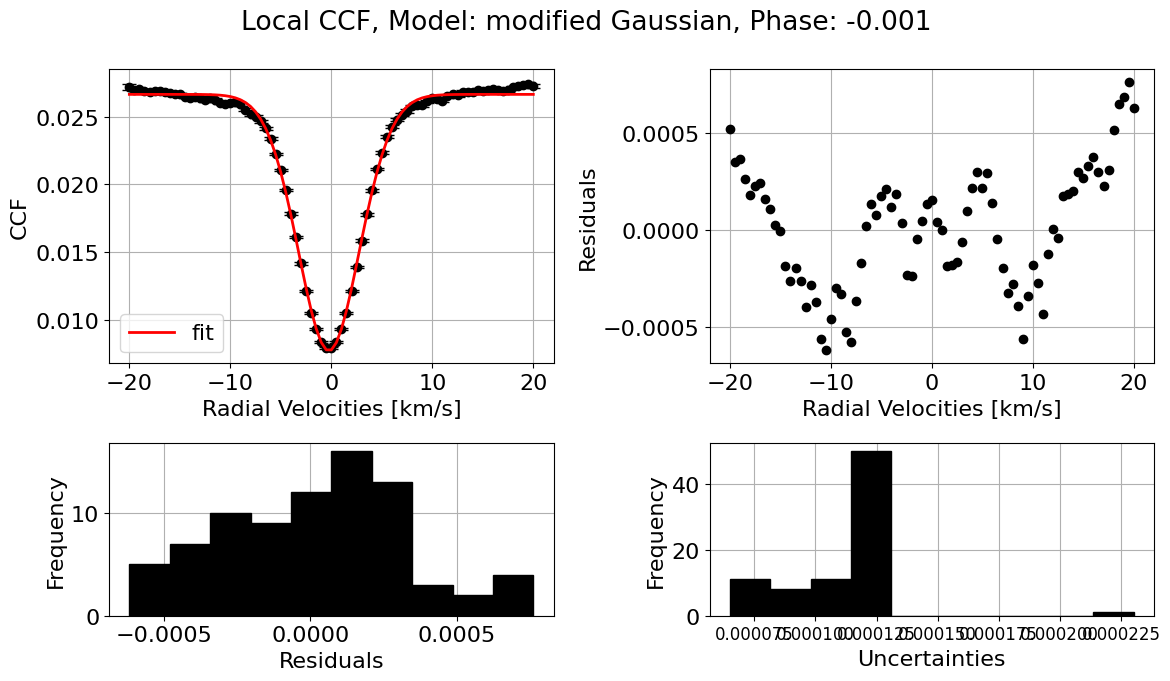

##############################
FITTING modified Gaussian model TO local CCF
Phase: 0.0006
------------------------------
Fit parameters:
y0 = 0.026730 ± 0.000019
x0 = 0.059567 ± 0.006137
sigma = 3.019183 ± 0.011155
a = 0.019011 ± 0.000044
c = 1.887438 ± 0.012562
R^2:  0.9976
------------------------------
CCF parameters:
Central RV [km/s]: 0.059567 ± 0.006137
Continuum: 0.026730 ± 0.000019
Deph [%]: 28.877665 ± 0.172882
Width [km/s]: 3.019183 ± 0.011155


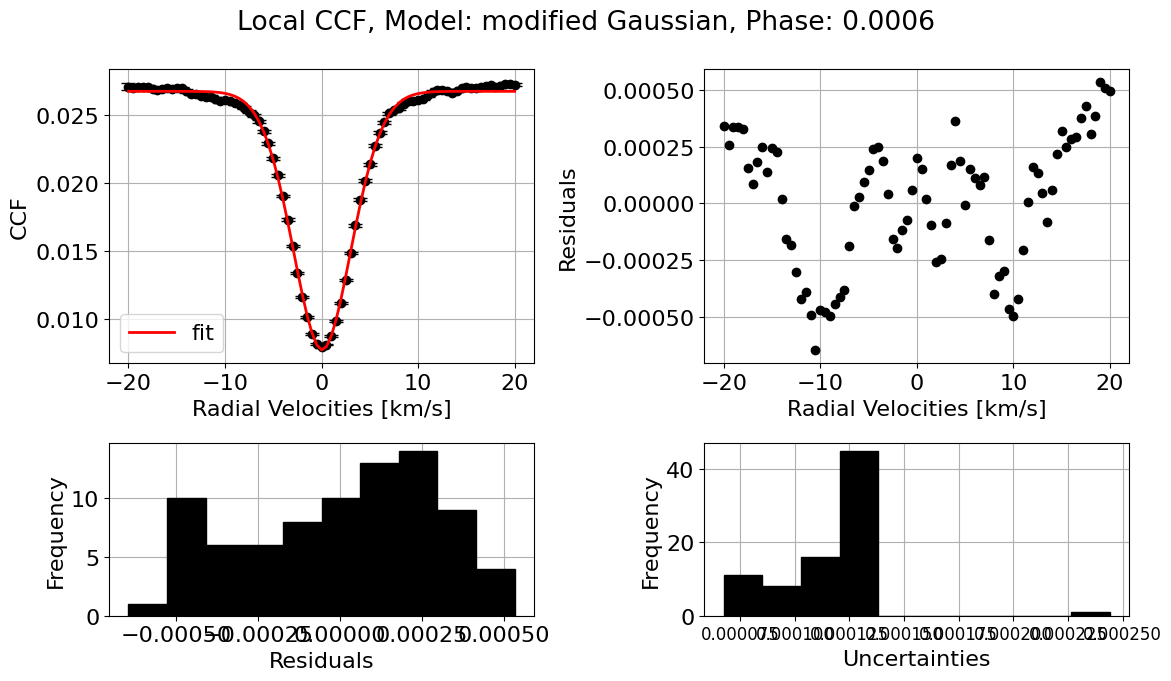

##############################
FITTING modified Gaussian model TO local CCF
Phase: 0.0025
------------------------------
Fit parameters:
y0 = 0.026408 ± 0.000019
x0 = 0.376423 ± 0.006166
sigma = 3.037830 ± 0.011146
a = 0.018711 ± 0.000043
c = 1.911850 ± 0.012782
R^2:  0.9967
------------------------------
CCF parameters:
Central RV [km/s]: 0.376423 ± 0.006166
Continuum: 0.026408 ± 0.000019
Deph [%]: 29.149460 ± 0.172110
Width [km/s]: 3.037830 ± 0.011146


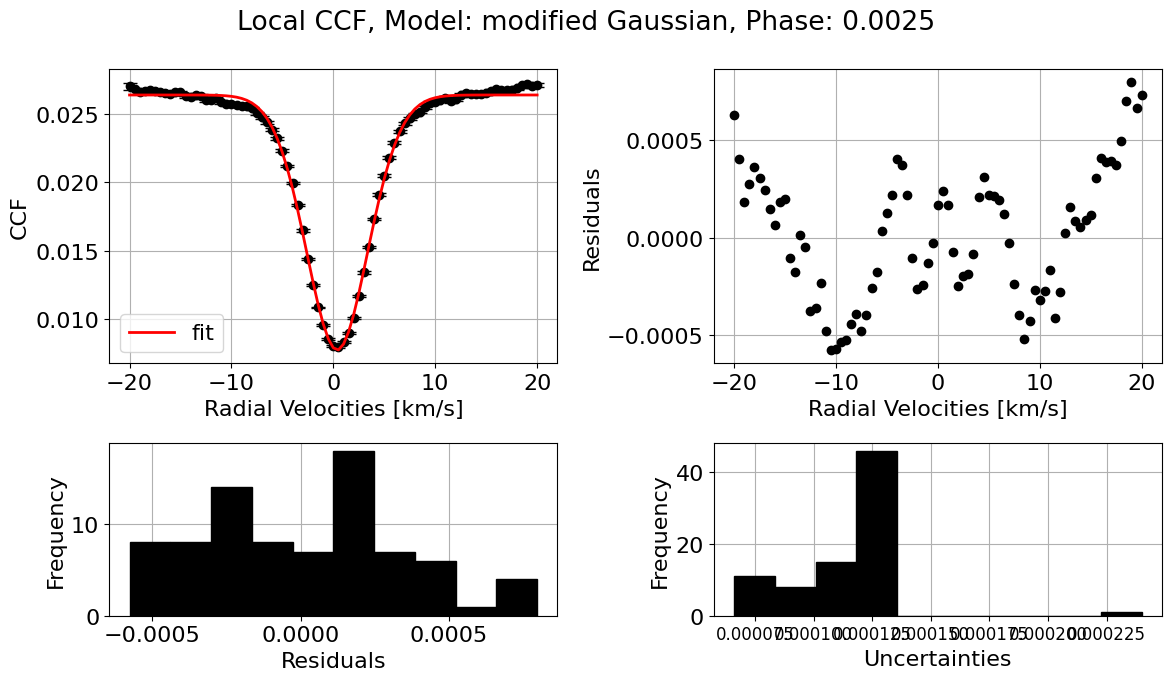

##############################
FITTING modified Gaussian model TO local CCF
Phase: 0.0044
------------------------------
Fit parameters:
y0 = 0.025567 ± 0.000018
x0 = 0.733020 ± 0.006072
sigma = 2.984412 ± 0.011128
a = 0.018302 ± 0.000043
c = 1.873130 ± 0.012387
R^2:  0.9974
------------------------------
CCF parameters:
Central RV [km/s]: 0.733020 ± 0.006072
Continuum: 0.025567 ± 0.000018
Deph [%]: 28.415940 ± 0.175010
Width [km/s]: 2.984412 ± 0.011128


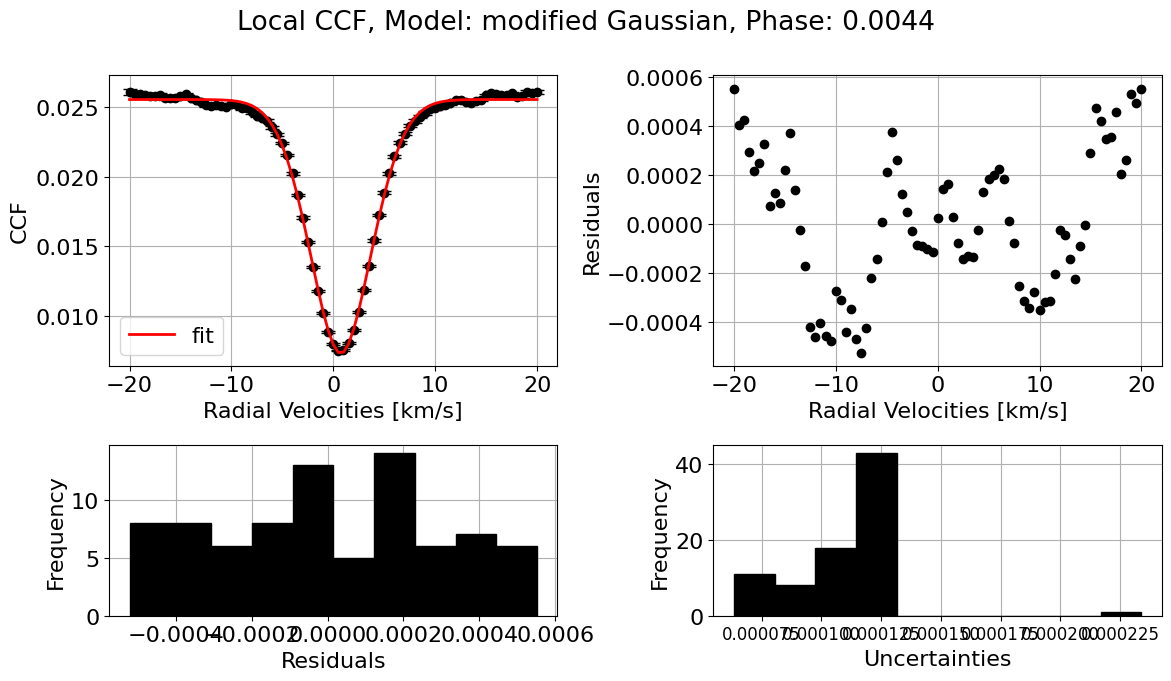

##############################
FITTING modified Gaussian model TO local CCF
Phase: 0.0062
------------------------------
Fit parameters:
y0 = 0.024538 ± 0.000019
x0 = 1.034131 ± 0.006689
sigma = 3.019775 ± 0.012141
a = 0.017214 ± 0.000044
c = 1.881462 ± 0.013458
R^2:  0.9971
------------------------------
CCF parameters:
Central RV [km/s]: 1.034131 ± 0.006689
Continuum: 0.024538 ± 0.000019
Deph [%]: 29.847618 ± 0.186076
Width [km/s]: 3.019775 ± 0.012141


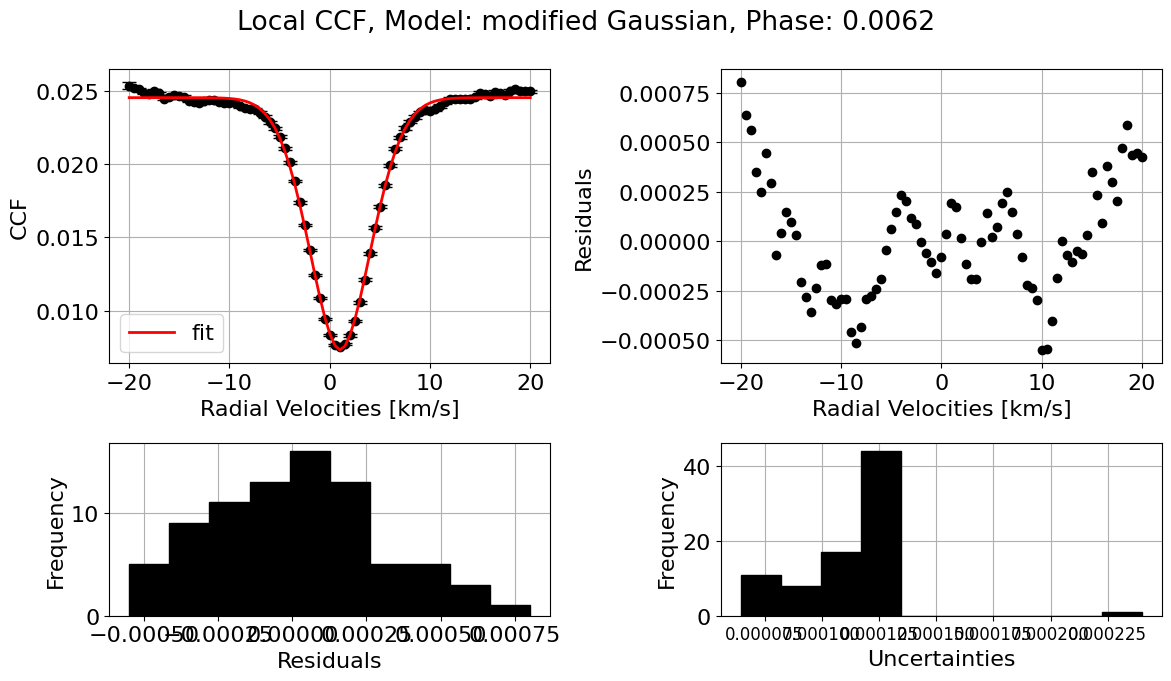

##############################
FITTING modified Gaussian model TO local CCF
Phase: 0.0081
------------------------------
Fit parameters:
y0 = 0.022604 ± 0.000019
x0 = 1.341527 ± 0.007476
sigma = 3.027724 ± 0.013623
a = 0.015680 ± 0.000045
c = 1.895655 ± 0.015194
R^2:  0.997
------------------------------
CCF parameters:
Central RV [km/s]: 1.341527 ± 0.007476
Continuum: 0.022604 ± 0.000019
Deph [%]: 30.630026 ± 0.207921
Width [km/s]: 3.027724 ± 0.013623


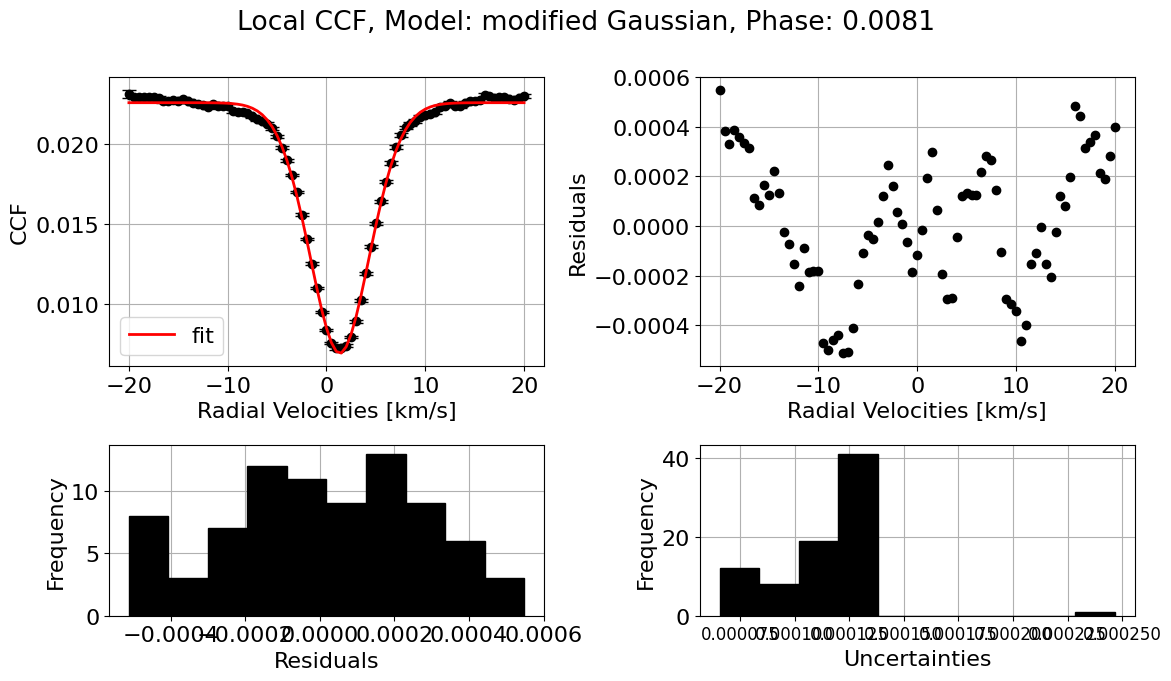

##############################
FITTING modified Gaussian model TO local CCF
Phase: 0.0100
------------------------------
Fit parameters:
y0 = 0.018619 ± 0.000018
x0 = 1.645105 ± 0.009158
sigma = 3.040635 ± 0.016767
a = 0.012734 ± 0.000045
c = 1.889260 ± 0.018391
R^2:  0.9968
------------------------------
CCF parameters:
Central RV [km/s]: 1.645105 ± 0.009158
Continuum: 0.018619 ± 0.000018
Deph [%]: 31.606717 ± 0.251846
Width [km/s]: 3.040635 ± 0.016767


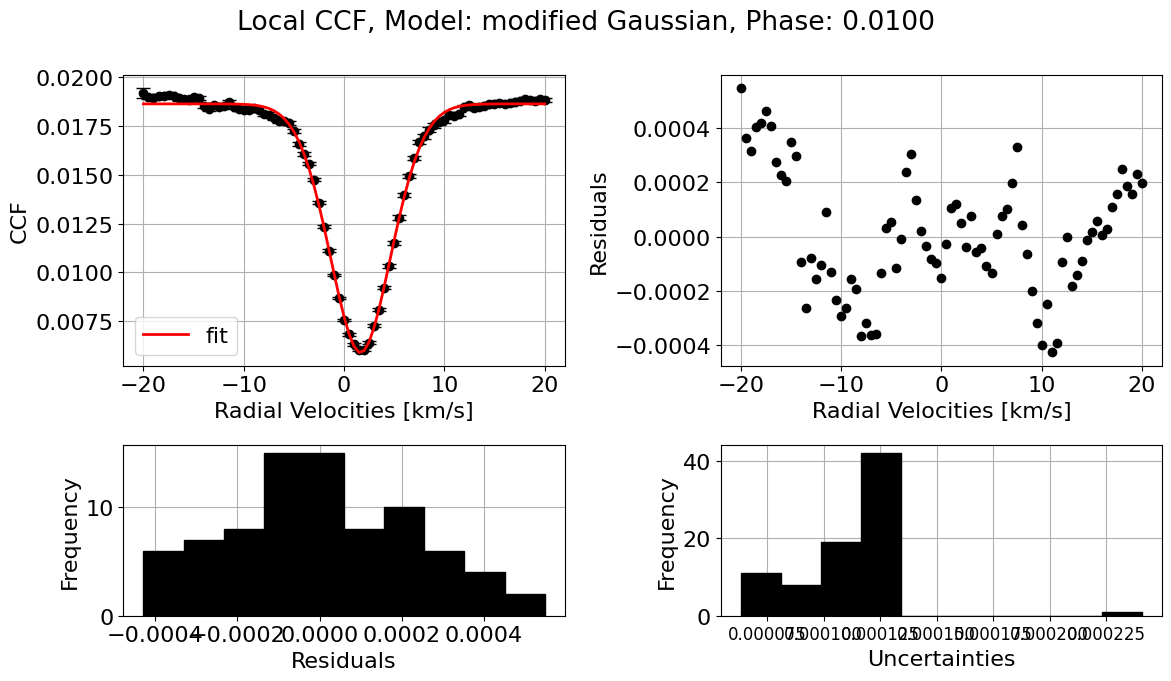

##############################
FITTING modified Gaussian model TO local CCF
Phase: 0.0119
------------------------------
Fit parameters:
y0 = 0.012546 ± 0.000018
x0 = 1.908653 ± 0.014114
sigma = 3.100200 ± 0.025478
a = 0.008358 ± 0.000045
c = 1.951397 ± 0.029182
R^2:  0.9956
------------------------------
CCF parameters:
Central RV [km/s]: 1.908653 ± 0.014114
Continuum: 0.012546 ± 0.000018
Deph [%]: 33.378698 ± 0.373280
Width [km/s]: 3.100200 ± 0.025478


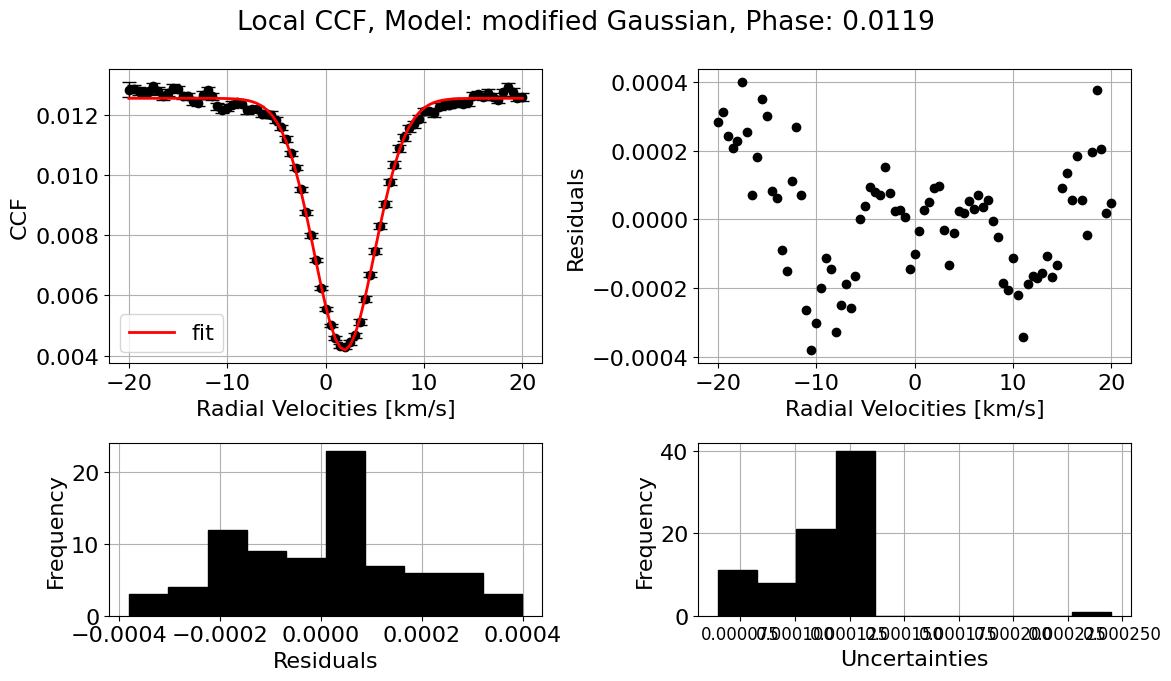

##############################
FITTING modified Gaussian model TO local CCF
Phase: 0.0137
------------------------------
Fit parameters:
y0 = 0.006348 ± 0.000017
x0 = 2.098744 ± 0.025975
sigma = 3.124999 ± 0.044299
a = 0.004262 ± 0.000042
c = 2.198957 ± 0.063842
R^2:  0.9892
------------------------------
CCF parameters:
Central RV [km/s]: 2.098744 ± 0.025975
Continuum: 0.006348 ± 0.000017
Deph [%]: 32.859404 ± 0.688611
Width [km/s]: 3.124999 ± 0.044299


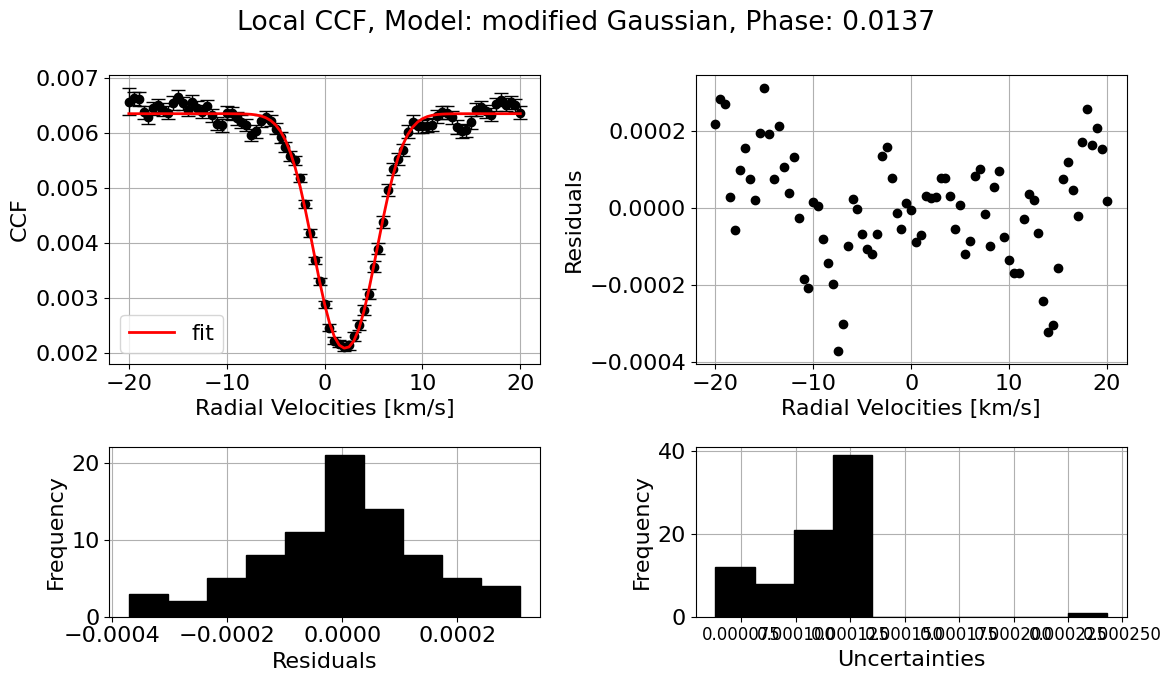

##############################
FITTING modified Gaussian model TO local CCF
Phase: 0.0156
------------------------------
Fit parameters:
y0 = 0.001529 ± 0.000016
x0 = 1.898501 ± 0.084785
sigma = 2.935515 ± 0.136053
a = 0.001133 ± 0.000039
c = 2.541418 ± 0.282432
R^2:  0.9311
------------------------------
CCF parameters:
Central RV [km/s]: 1.898501 ± 0.084785
Continuum: 0.001529 ± 0.000016
Deph [%]: 25.864160 ± 2.659039
Width [km/s]: 2.935515 ± 0.136053


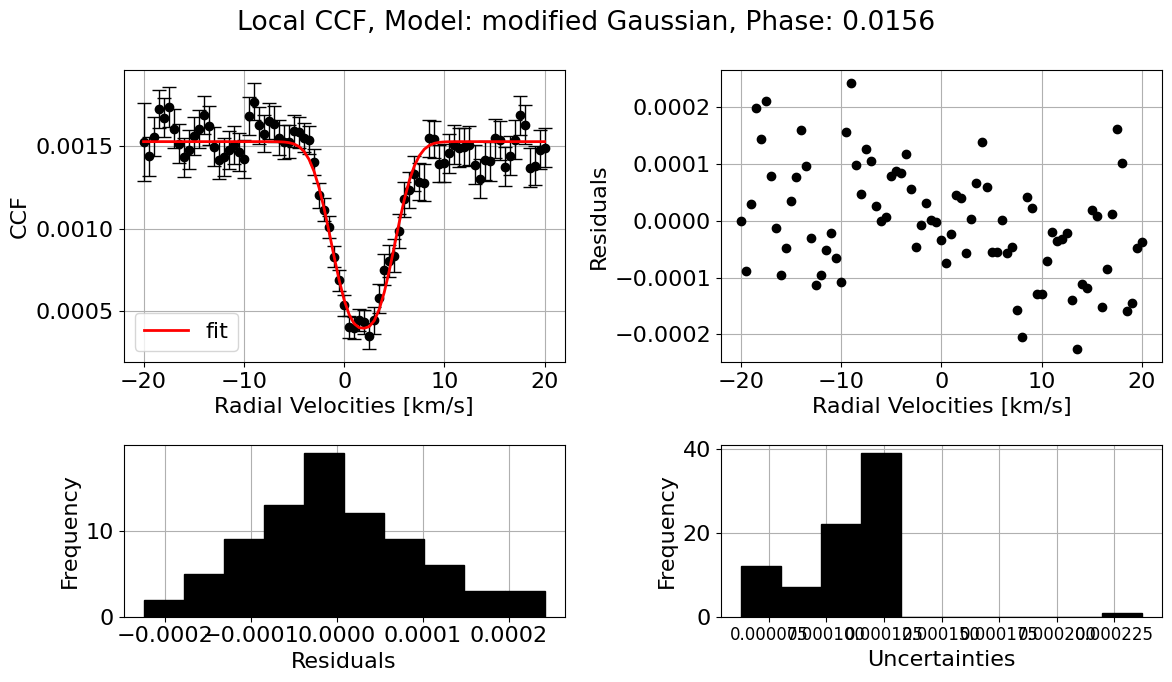

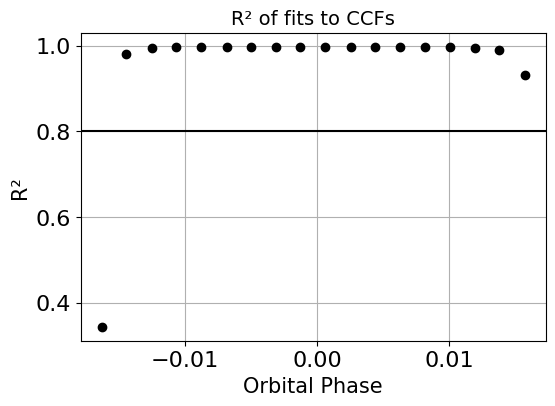

In [11]:
central_rv_array, continuum_array, depth_array, width_array, R2_array = hecate._CCF_parameters(CCFs=local_CCFs, ccf_type="local", model="modified Gaussian", print_output=True, plot_fit=True, save=None)

In [14]:
width_array 

array([[1.85481105, 0.66422113],
       [2.90522986, 0.09493811],
       [3.13527631, 0.03745717],
       [3.20459364, 0.02430575],
       [3.14950266, 0.01865749],
       [3.07075178, 0.01364507],
       [3.02961451, 0.01191801],
       [3.00141484, 0.01113707],
       [3.03778899, 0.01066428],
       [3.0191835 , 0.01115549],
       [3.03782981, 0.01114587],
       [2.9844118 , 0.01112777],
       [3.01977497, 0.01214115],
       [3.02772421, 0.01362273],
       [3.04063468, 0.01676742],
       [3.10020006, 0.02547778],
       [3.12499935, 0.0442991 ],
       [2.9355148 , 0.1360533 ]])

## Strong Fe I lines

In [4]:
from get_data import *

spectra, time, airmass, berv, bervmax, snr, list_spectra = get_spectra()

In [5]:
mask = np.array([4365.9004, 5250.6527, 6027.0562,
4432.5726, 5253.4693, 6056.0114, 4445.4760, 5365.4063, 6065.4921,
4523.4015, 5367.4755, 6151.6217, 4574.2191, 5369.9702, 6157.7331,
4602.0006, 5373.7136, 6173.3433, 4678.8519, 5379.5796, 6180.2084,
4741.5341, 5389.4866, 6200.3204, 4839.5500, 5432.9525, 6213.4375,
4874.3565, 5445.0502, 6219.2886, 4875.8815, 5473.9076, 6232.6493,
4885.4361, 5525.5472, 6265.1412, 4892.8624, 5543.9399, 6270.2322,
4909.3874, 5638.2675, 6297.8013, 4918.0152, 5662.5233, 6322.6936,
4946.3941, 5701.5527, 6335.3378, 4950.1108, 5705.4677, 6408.0262,
4983.2566, 5717.8379, 6430.8538, 5044.2164, 5731.7666, 6481.8784, 
5090.7807, 5753.1287, 6498.9461, 5141.7460, 5775.0849, 6593.8798, 
5242.4988, 5916.2535, 6609.1189, 5243.7823, 5956.6997, 6750.1597, 
5250.2171, 6007.9656, 6855.1684]) #air wavelengths

/home/telmo/phd_seminar/utils.py:76: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(1 - b**2 - (a_R*np.sin(2*np.pi*np.abs(phases)))**2)


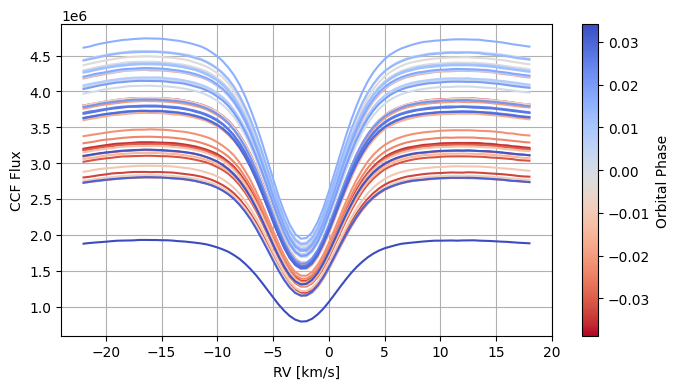

In [6]:
from build_CCF import build_CCF

RV_reference = np.arange(-22,18.5,0.5) #why?

CCFs_strong_iron = build_CCF(time, planet_params, spectra, RV_reference, mask, berv, bervmax, plot=True).CCFs

/home/telmo/phd_seminar/utils.py:76: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(1 - b**2 - (a_R*np.sin(2*np.pi*np.abs(phases)))**2)


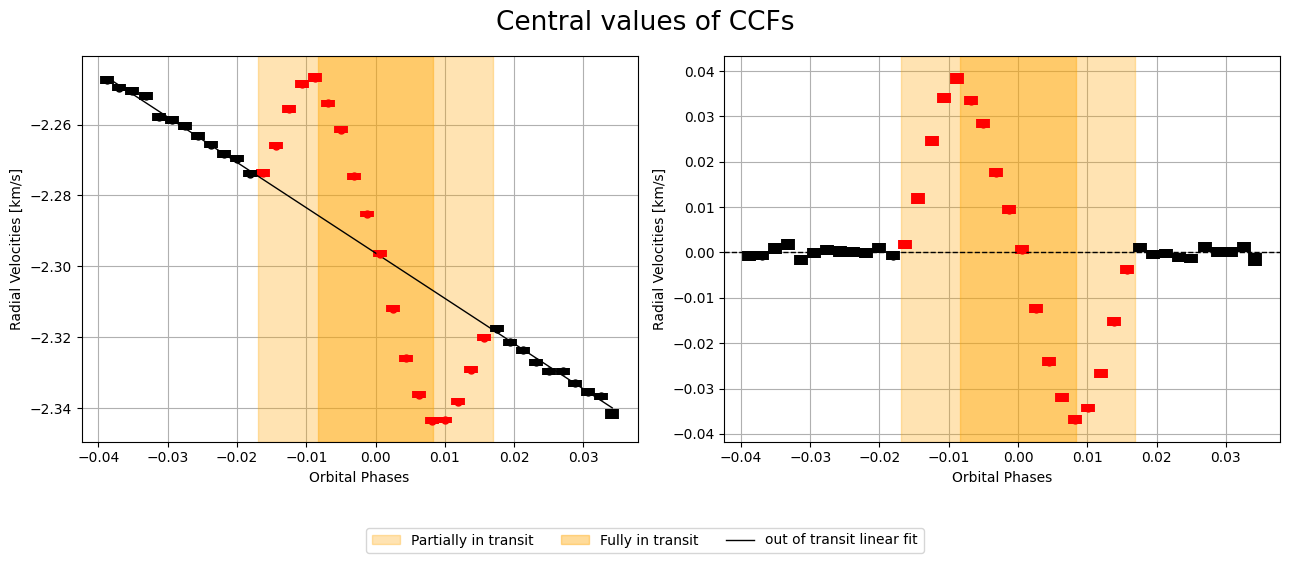

In [7]:
from RM_correction import RM_correction
rm_corr = RM_correction(planet_params, time, CCFs_strong_iron, model="modified Gaussian", plot_fits=False, plot_rm=True)

CCFs_RM_corr = rm_corr.CCFs_RM_corr
x0_corr = rm_corr.x0_corr

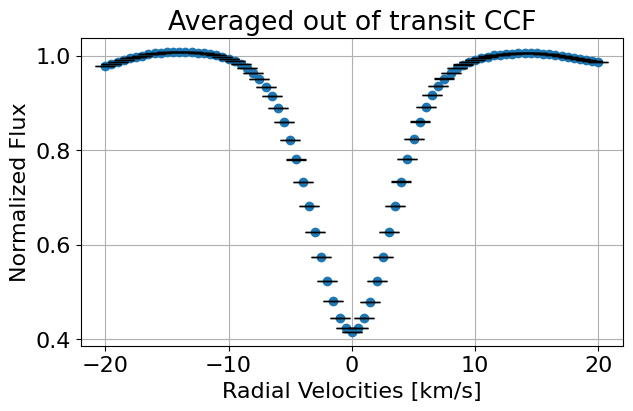

In [8]:
from HECATE_DS import HECATE

hecate = HECATE(planet_params, stellar_params, time, CCFs_RM_corr)

RV_reference = np.arange(-20,20.5,0.5)

CCF_interp, avg_out_of_transit_CCF = hecate._avg_out_of_transit_CCF(CCFs_RM_corr, RV_reference, plot=True, save=None)

##############################
FITTING modified Gaussian model TO master CCF
------------------------------
Fit parameters:
y0 = 1.000319 ± 0.000014
x0 = 0.000070 ± 0.000167
sigma = 3.155989 ± 0.000307
a = 0.587418 ± 0.000036
c = 1.882122 ± 0.000320
R^2:  0.9991
------------------------------
CCF parameters:
Central RV [km/s]: 0.000070 ± 0.000167
Continuum: 1.000319 ± 0.000014
Deph [%]: 41.276949 ± 0.003656
Width [km/s]: 3.155989 ± 0.000307


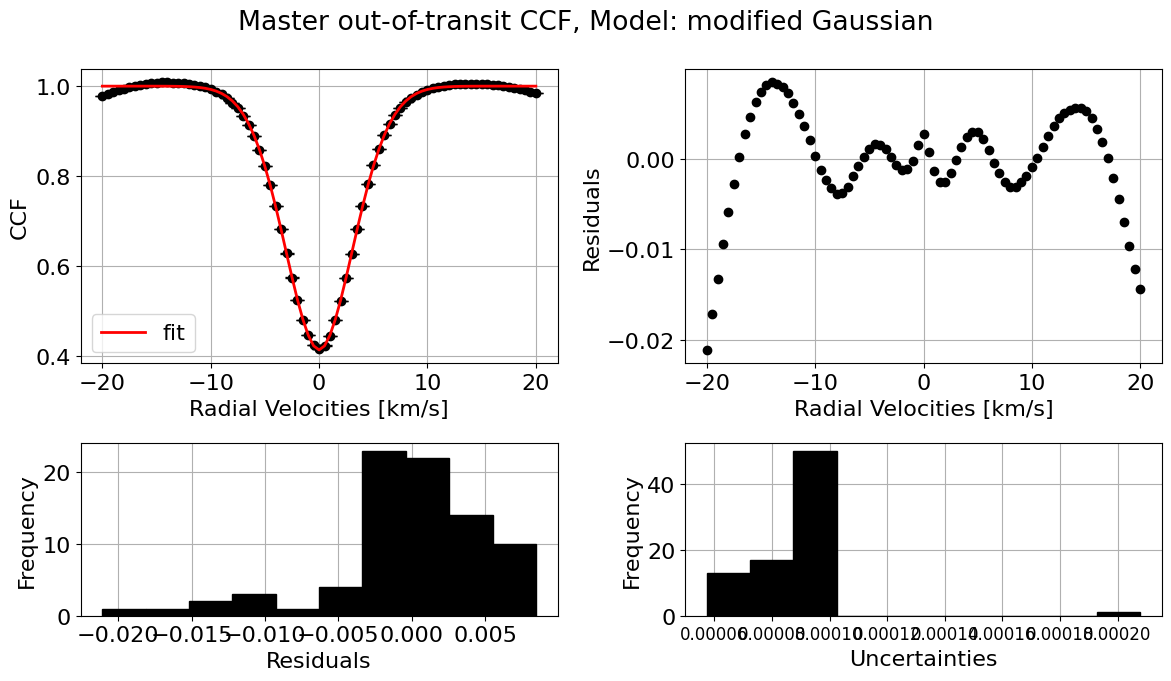

In [9]:
master_central_rv_array, master_continuum_array, master_depth_array, master_width_array, master_R2_array = hecate._CCF_parameters(CCFs=avg_out_of_transit_CCF, ccf_type="master", model="modified Gaussian", print_output=True, plot_fit=True, save=None)

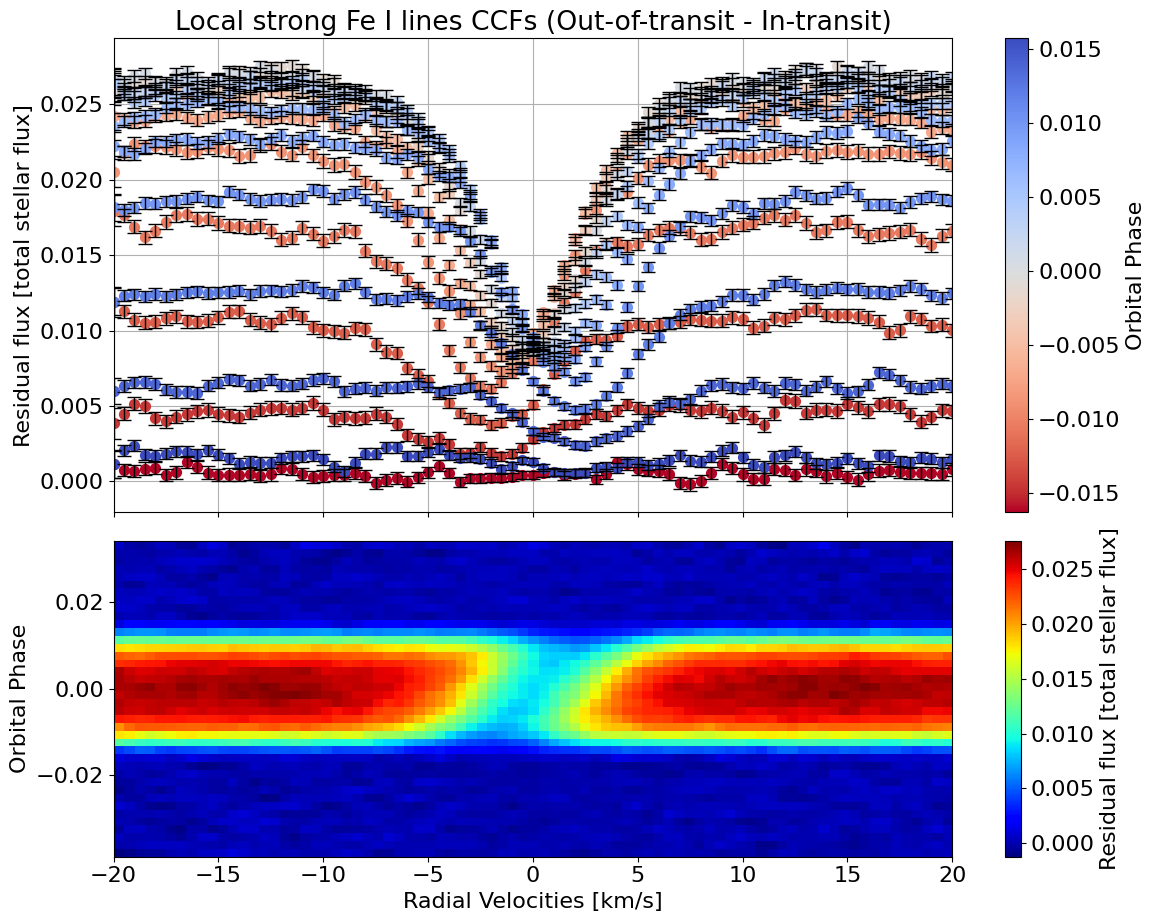

In [10]:
RV_reference = np.arange(-20,20.5,0.5)

ccf_type = "strong Fe I lines"
model_fit = "modified Gaussian"
plot = {"SOAP":False, "fits_initial_CCF":False, "RM":False, "avg_out_of_transit_CCF":False, "local_CCFs":True}

local_CCFs, CCFs_sub_all, CCFs_flux_corr, phases, in_phases = hecate._extract_local_CCF(RV_reference, model_fit, ccf_type, plot, save=None)

##############################
FITTING modified Gaussian model TO local CCF
Phase: -0.016
------------------------------
Fit parameters:
y0 = 0.000575 ± 0.000051
x0 = -5.496053 ± 0.704224
sigma = 5.272951 ± 0.855892
a = 0.000280 ± 0.000099
c = 16.043880 ± 46.250402
R^2:  0.1483
------------------------------
CCF parameters:
Central RV [km/s]: -5.496053 ± 0.704224
Continuum: 0.000575 ± 0.000051
Deph [%]: 51.354365 ± 17.827418
Width [km/s]: 5.272951 ± 0.855892


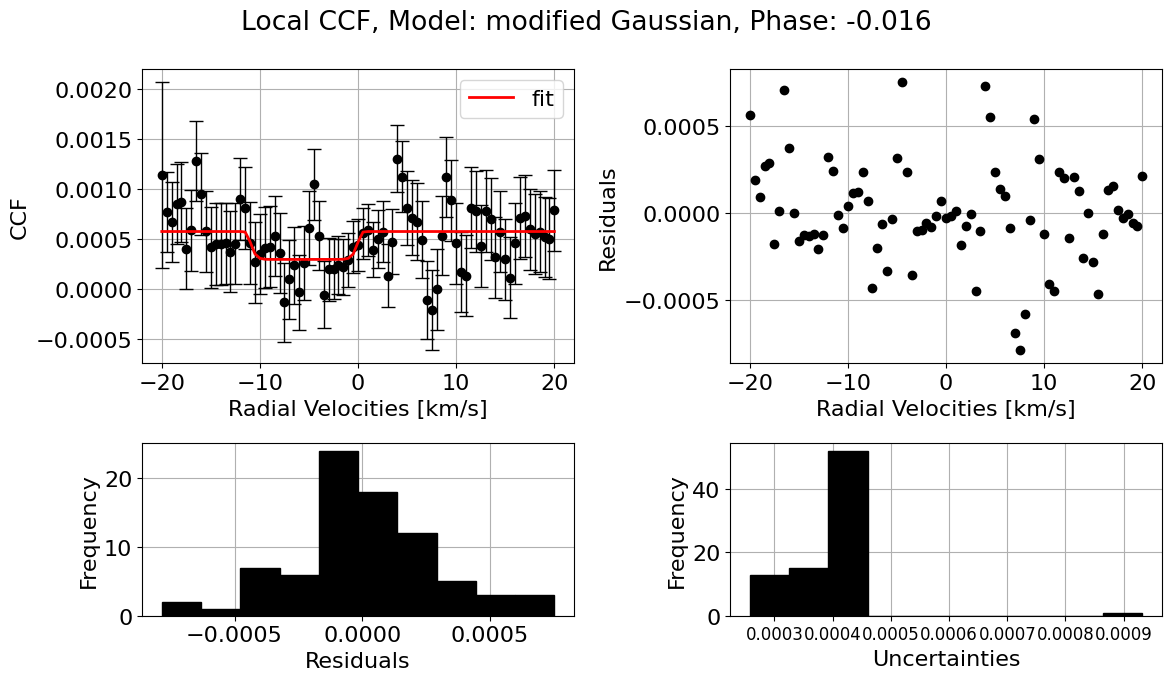

##############################
FITTING modified Gaussian model TO local CCF
Phase: -0.014
------------------------------
Fit parameters:
y0 = 0.004668 ± 0.000060
x0 = -2.470261 ± 0.146372
sigma = 2.850552 ± 0.251715
a = 0.002812 ± 0.000178
c = 2.340403 ± 0.440181
R^2:  0.8714
------------------------------
CCF parameters:
Central RV [km/s]: -2.470261 ± 0.146372
Continuum: 0.004668 ± 0.000060
Deph [%]: 39.752371 ± 3.889208
Width [km/s]: 2.850552 ± 0.251715


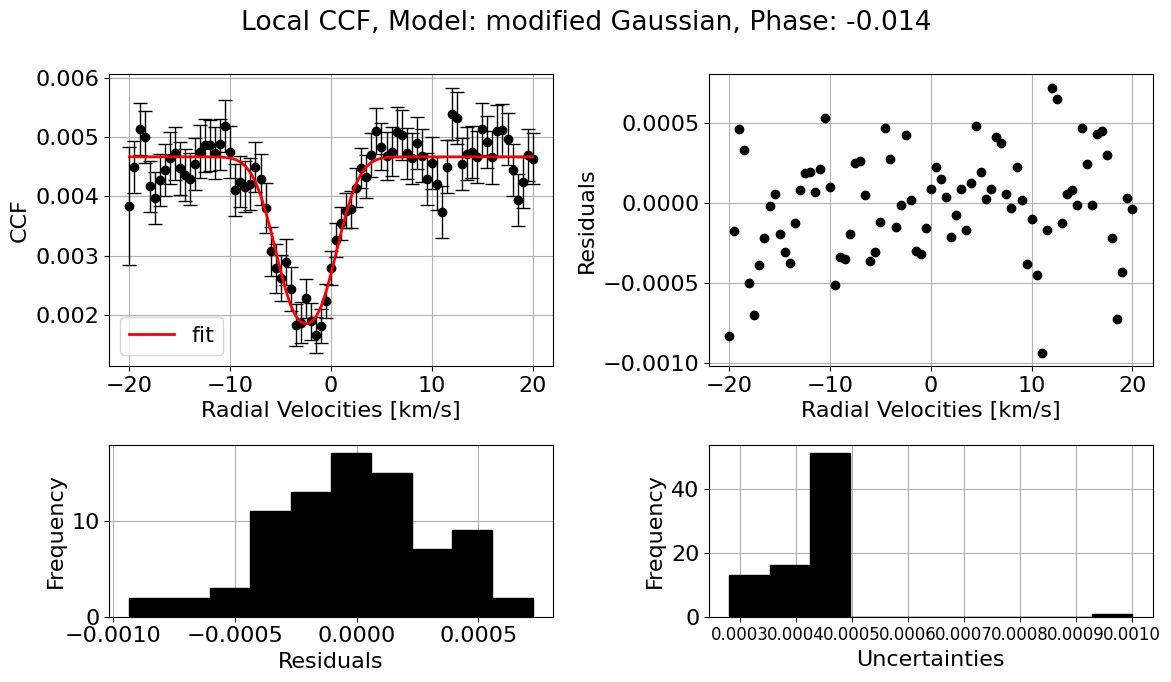

##############################
FITTING modified Gaussian model TO local CCF
Phase: -0.012
------------------------------
Fit parameters:
y0 = 0.010709 ± 0.000063
x0 = -2.177040 ± 0.062645
sigma = 2.848421 ± 0.116293
a = 0.006984 ± 0.000187
c = 1.959109 ± 0.141241
R^2:  0.9748
------------------------------
CCF parameters:
Central RV [km/s]: -2.177040 ± 0.062645
Continuum: 0.010709 ± 0.000063
Deph [%]: 34.785482 ± 1.783844
Width [km/s]: 2.848421 ± 0.116293


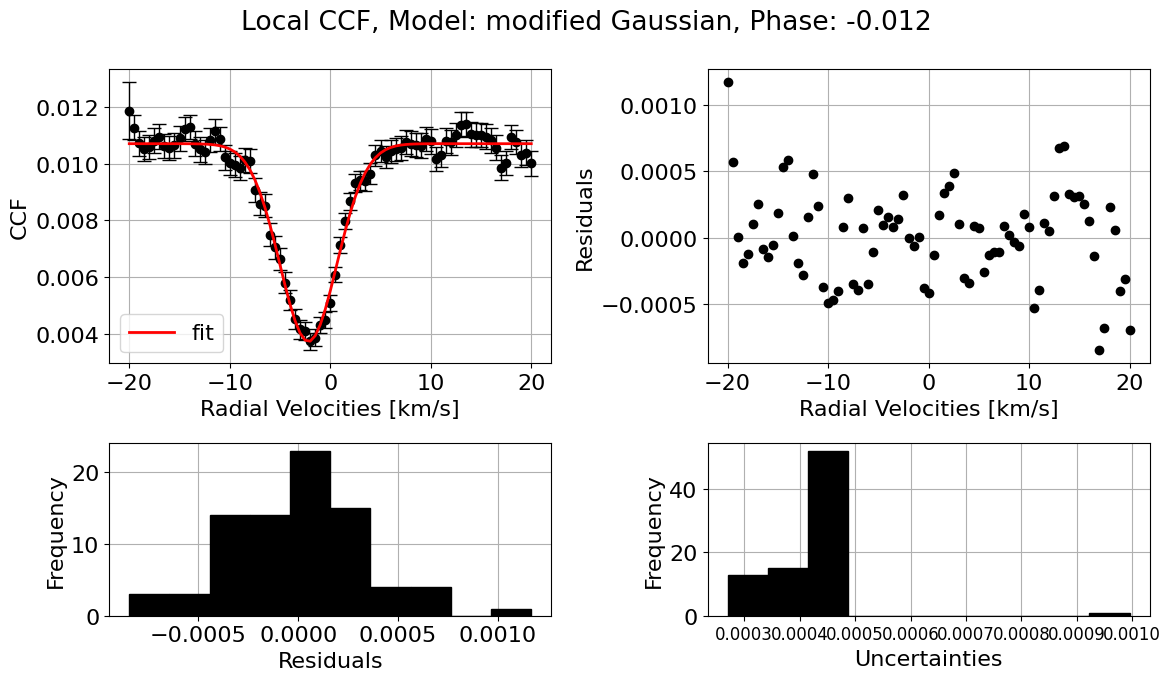

##############################
FITTING modified Gaussian model TO local CCF
Phase: -0.010
------------------------------
Fit parameters:
y0 = 0.016786 ± 0.000064
x0 = -1.863275 ± 0.041403
sigma = 2.773928 ± 0.075172
a = 0.010568 ± 0.000188
c = 2.028671 ± 0.101069
R^2:  0.9782
------------------------------
CCF parameters:
Central RV [km/s]: -1.863275 ± 0.041403
Continuum: 0.016786 ± 0.000064
Deph [%]: 37.042393 ± 1.143774
Width [km/s]: 2.773928 ± 0.075172


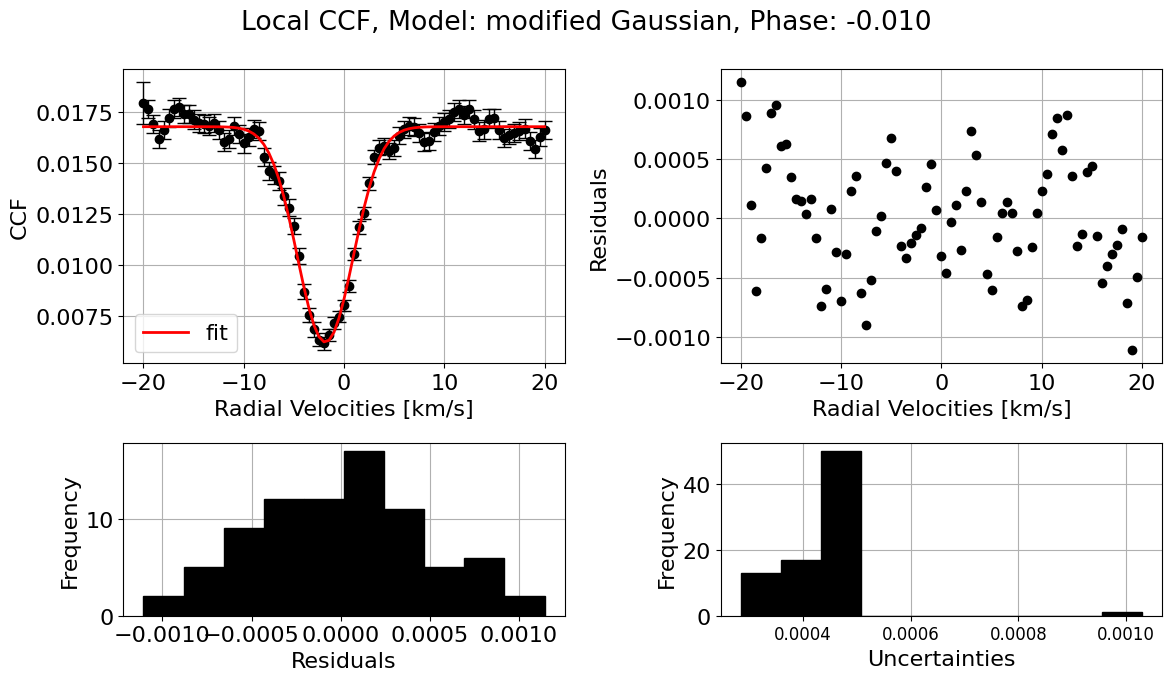

##############################
FITTING modified Gaussian model TO local CCF
Phase: -0.008
------------------------------
Fit parameters:
y0 = 0.021787 ± 0.000070
x0 = -1.537948 ± 0.032132
sigma = 2.700021 ± 0.063265
a = 0.014690 ± 0.000208
c = 1.715305 ± 0.061815
R^2:  0.9935
------------------------------
CCF parameters:
Central RV [km/s]: -1.537948 ± 0.032132
Continuum: 0.021787 ± 0.000070
Deph [%]: 32.574119 ± 0.976924
Width [km/s]: 2.700021 ± 0.063265


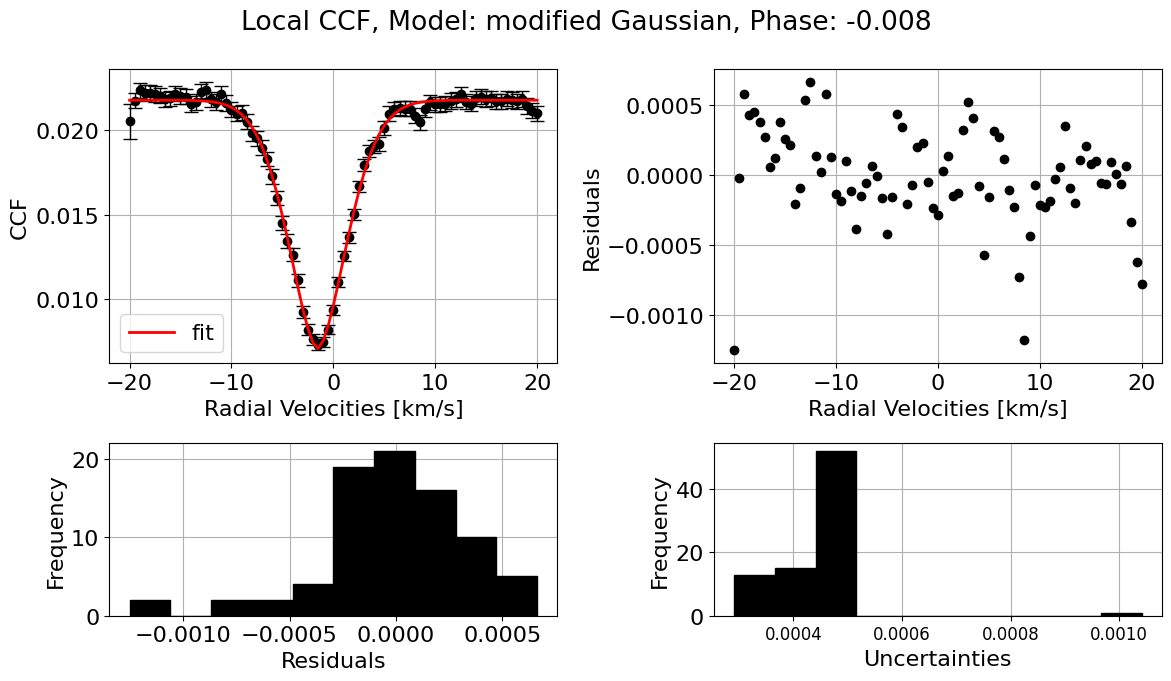

##############################
FITTING modified Gaussian model TO local CCF
Phase: -0.006
------------------------------
Fit parameters:
y0 = 0.024131 ± 0.000059
x0 = -1.180284 ± 0.024724
sigma = 2.728116 ± 0.047228
a = 0.015889 ± 0.000169
c = 1.816643 ± 0.051734
R^2:  0.9953
------------------------------
CCF parameters:
Central RV [km/s]: -1.180284 ± 0.024724
Continuum: 0.024131 ± 0.000059
Deph [%]: 34.154476 ± 0.718999
Width [km/s]: 2.728116 ± 0.047228


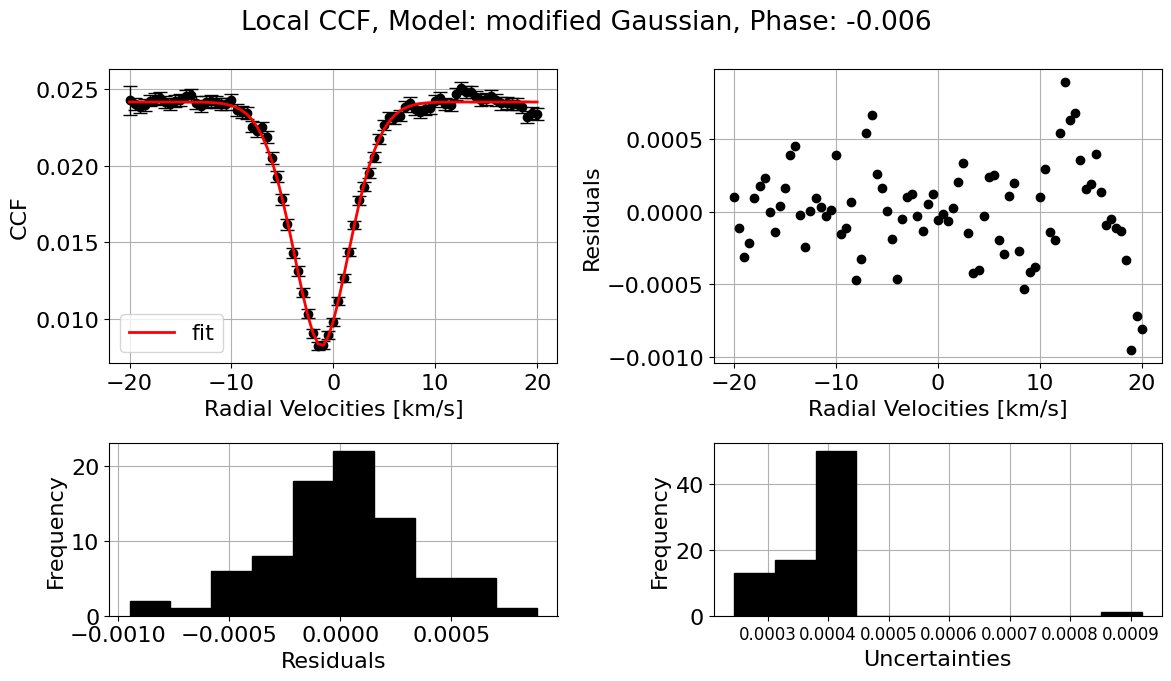

##############################
FITTING modified Gaussian model TO local CCF
Phase: -0.004
------------------------------
Fit parameters:
y0 = 0.025422 ± 0.000057
x0 = -0.855259 ± 0.020933
sigma = 2.494377 ± 0.041867
a = 0.017735 ± 0.000174
c = 1.685812 ± 0.042654
R^2:  0.9951
------------------------------
CCF parameters:
Central RV [km/s]: -0.855259 ± 0.020933
Continuum: 0.025422 ± 0.000057
Deph [%]: 30.239477 ± 0.702926
Width [km/s]: 2.494377 ± 0.041867


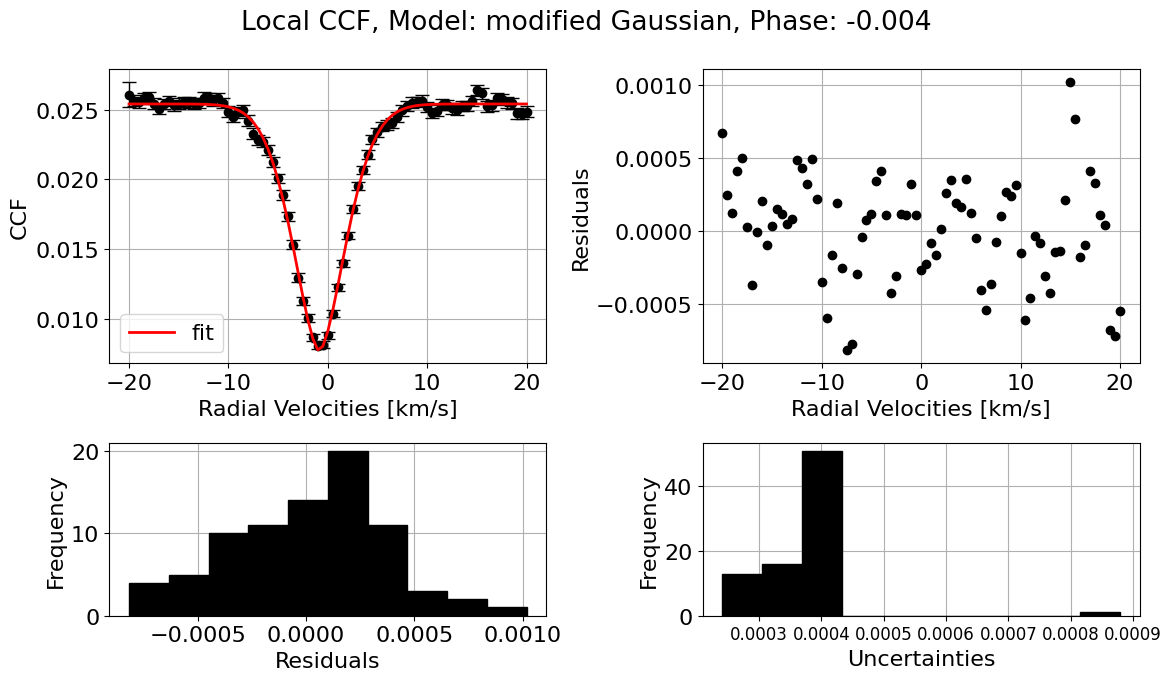

##############################
FITTING modified Gaussian model TO local CCF
Phase: -0.003
------------------------------
Fit parameters:
y0 = 0.026018 ± 0.000054
x0 = -0.523544 ± 0.020130
sigma = 2.630340 ± 0.038015
a = 0.017782 ± 0.000156
c = 1.825940 ± 0.043848
R^2:  0.9967
------------------------------
CCF parameters:
Central RV [km/s]: -0.523544 ± 0.020130
Continuum: 0.026018 ± 0.000054
Deph [%]: 31.653687 ± 0.615494
Width [km/s]: 2.630340 ± 0.038015


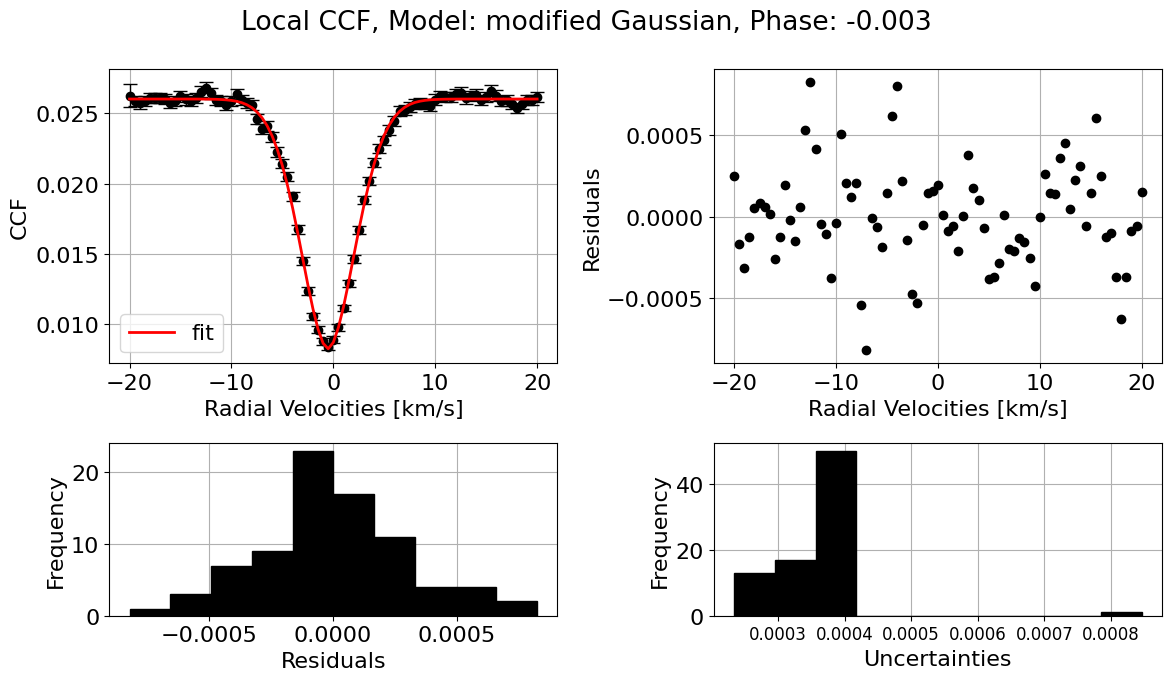

##############################
FITTING modified Gaussian model TO local CCF
Phase: -0.001
------------------------------
Fit parameters:
y0 = 0.026654 ± 0.000056
x0 = -0.271194 ± 0.020483
sigma = 2.739579 ± 0.038829
a = 0.018057 ± 0.000156
c = 1.821265 ± 0.043049
R^2:  0.9941
------------------------------
CCF parameters:
Central RV [km/s]: -0.271194 ± 0.020483
Continuum: 0.026654 ± 0.000056
Deph [%]: 32.255665 ± 0.600979
Width [km/s]: 2.739579 ± 0.038829


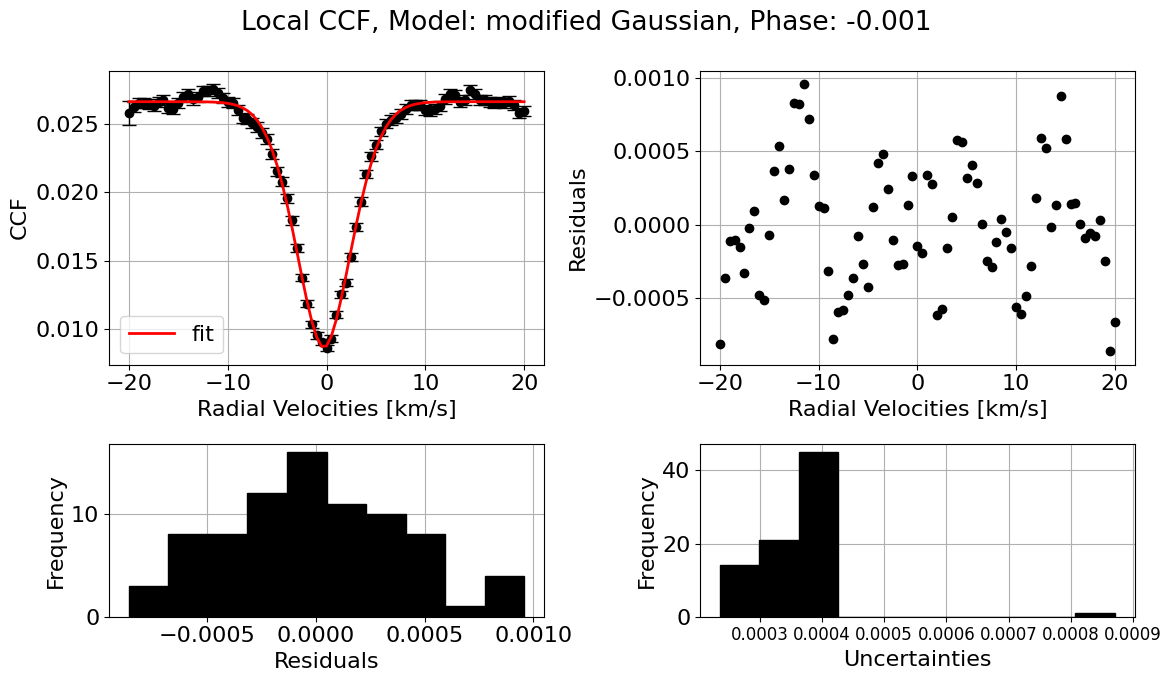

##############################
FITTING modified Gaussian model TO local CCF
Phase: 0.0006
------------------------------
Fit parameters:
y0 = 0.026734 ± 0.000057
x0 = -0.016927 ± 0.020956
sigma = 2.742727 ± 0.038917
a = 0.018148 ± 0.000157
c = 1.865044 ± 0.045326
R^2:  0.9964
------------------------------
CCF parameters:
Central RV [km/s]: -0.016927 ± 0.020956
Continuum: 0.026734 ± 0.000057
Deph [%]: 32.115093 ± 0.605758
Width [km/s]: 2.742727 ± 0.038917


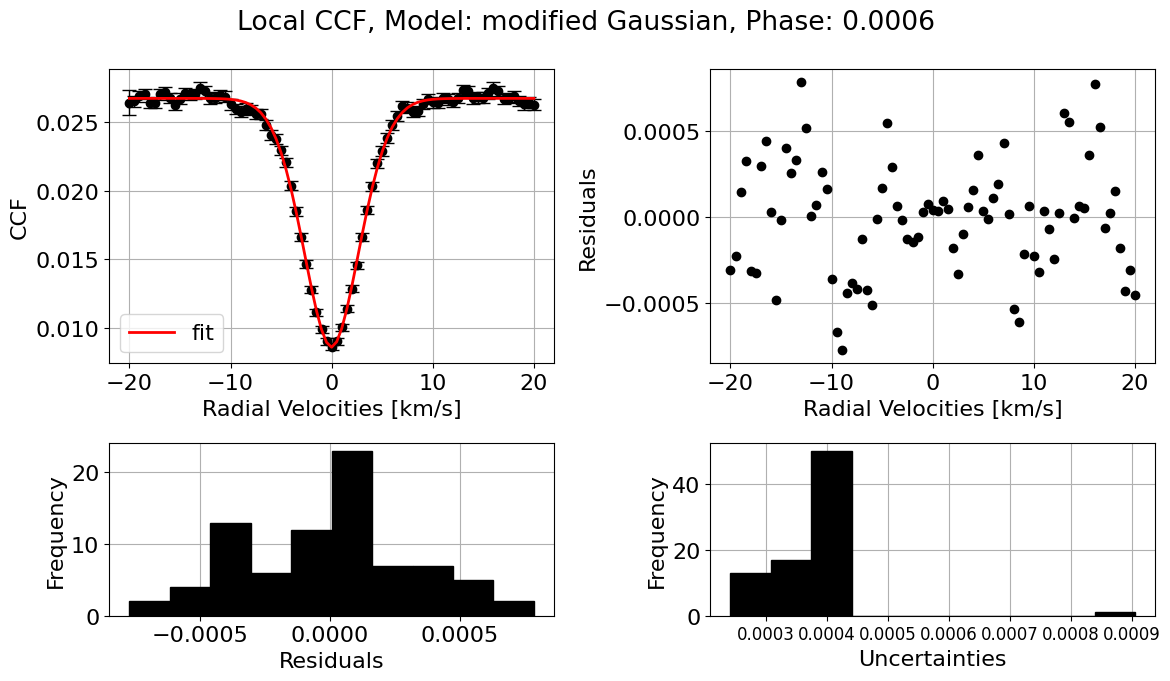

##############################
FITTING modified Gaussian model TO local CCF
Phase: 0.0025
------------------------------
Fit parameters:
y0 = 0.026356 ± 0.000056
x0 = 0.363929 ± 0.021135
sigma = 2.716817 ± 0.039498
a = 0.017784 ± 0.000158
c = 1.858155 ± 0.046069
R^2:  0.9948
------------------------------
CCF parameters:
Central RV [km/s]: 0.363929 ± 0.021135
Continuum: 0.026356 ± 0.000056
Deph [%]: 32.523235 ± 0.615863
Width [km/s]: 2.716817 ± 0.039498


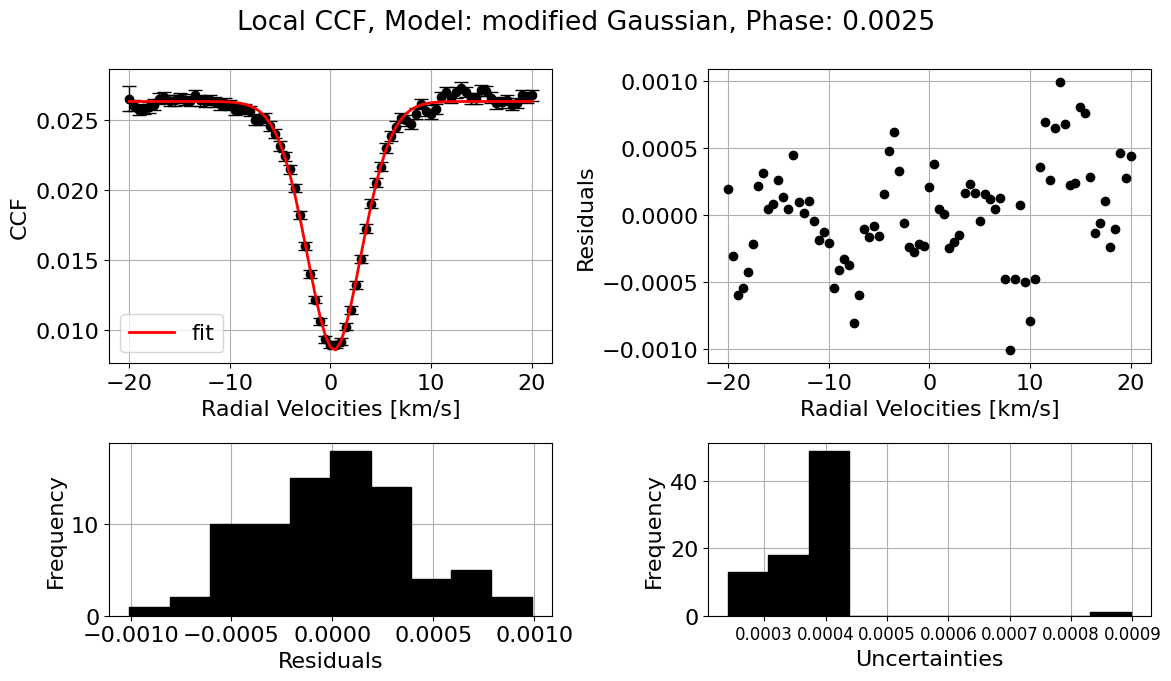

##############################
FITTING modified Gaussian model TO local CCF
Phase: 0.0044
------------------------------
Fit parameters:
y0 = 0.025639 ± 0.000053
x0 = 0.726411 ± 0.020412
sigma = 2.631880 ± 0.037876
a = 0.017252 ± 0.000153
c = 1.901579 ± 0.047566
R^2:  0.9935
------------------------------
CCF parameters:
Central RV [km/s]: 0.726411 ± 0.020412
Continuum: 0.025639 ± 0.000053
Deph [%]: 32.710976 ± 0.613655
Width [km/s]: 2.631880 ± 0.037876


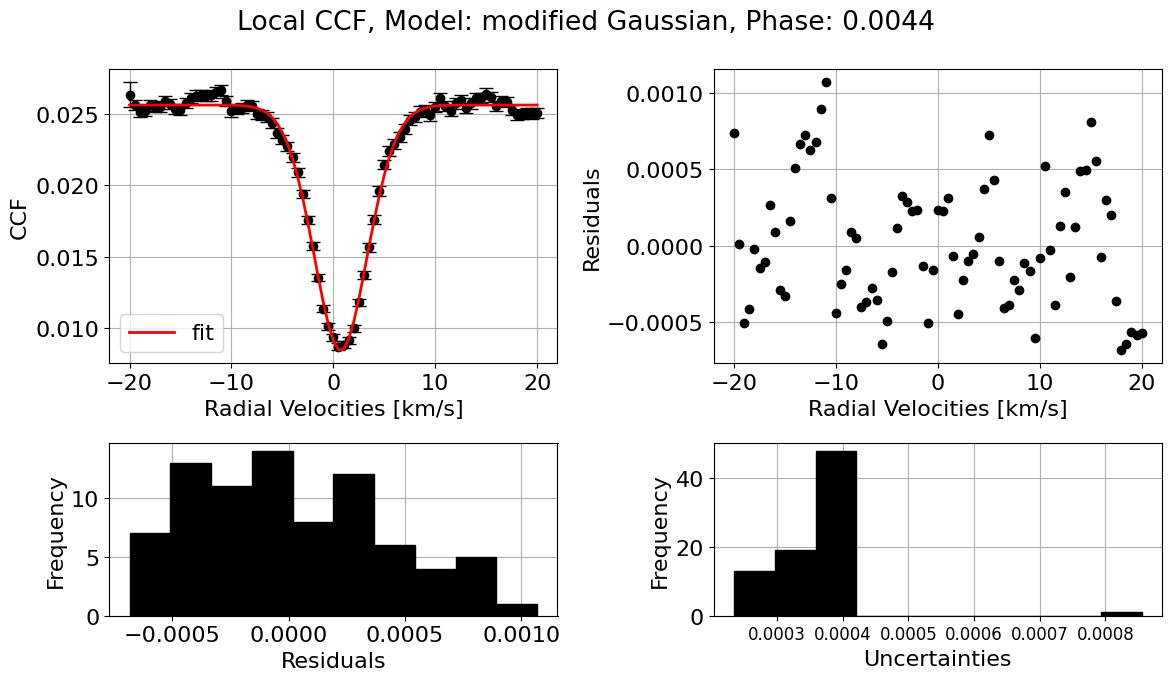

##############################
FITTING modified Gaussian model TO local CCF
Phase: 0.0062
------------------------------
Fit parameters:
y0 = 0.024543 ± 0.000056
x0 = 1.045400 ± 0.022807
sigma = 2.703183 ± 0.042973
a = 0.016463 ± 0.000160
c = 1.838950 ± 0.048875
R^2:  0.9945
------------------------------
CCF parameters:
Central RV [km/s]: 1.045400 ± 0.022807
Continuum: 0.024543 ± 0.000056
Deph [%]: 32.920957 ± 0.670042
Width [km/s]: 2.703183 ± 0.042973


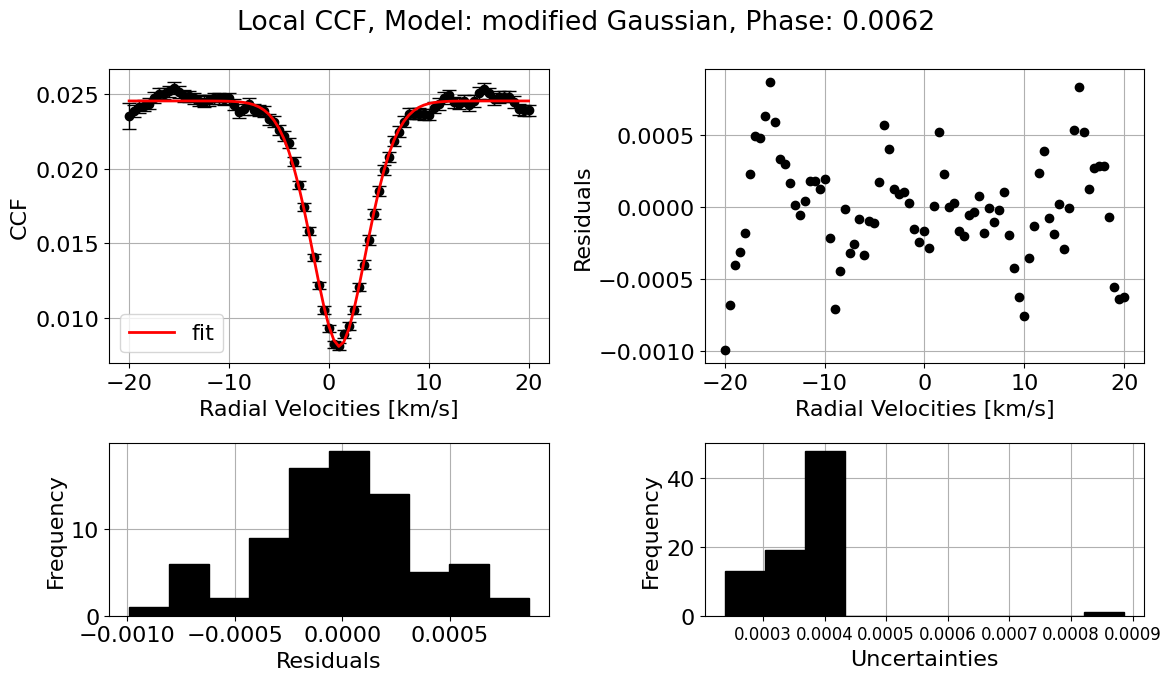

##############################
FITTING modified Gaussian model TO local CCF
Phase: 0.0081
------------------------------
Fit parameters:
y0 = 0.022598 ± 0.000056
x0 = 1.397376 ± 0.025418
sigma = 2.674047 ± 0.047623
a = 0.014822 ± 0.000164
c = 1.880322 ± 0.057053
R^2:  0.9909
------------------------------
CCF parameters:
Central RV [km/s]: 1.397376 ± 0.025418
Continuum: 0.022598 ± 0.000056
Deph [%]: 34.410134 ± 0.745847
Width [km/s]: 2.674047 ± 0.047623


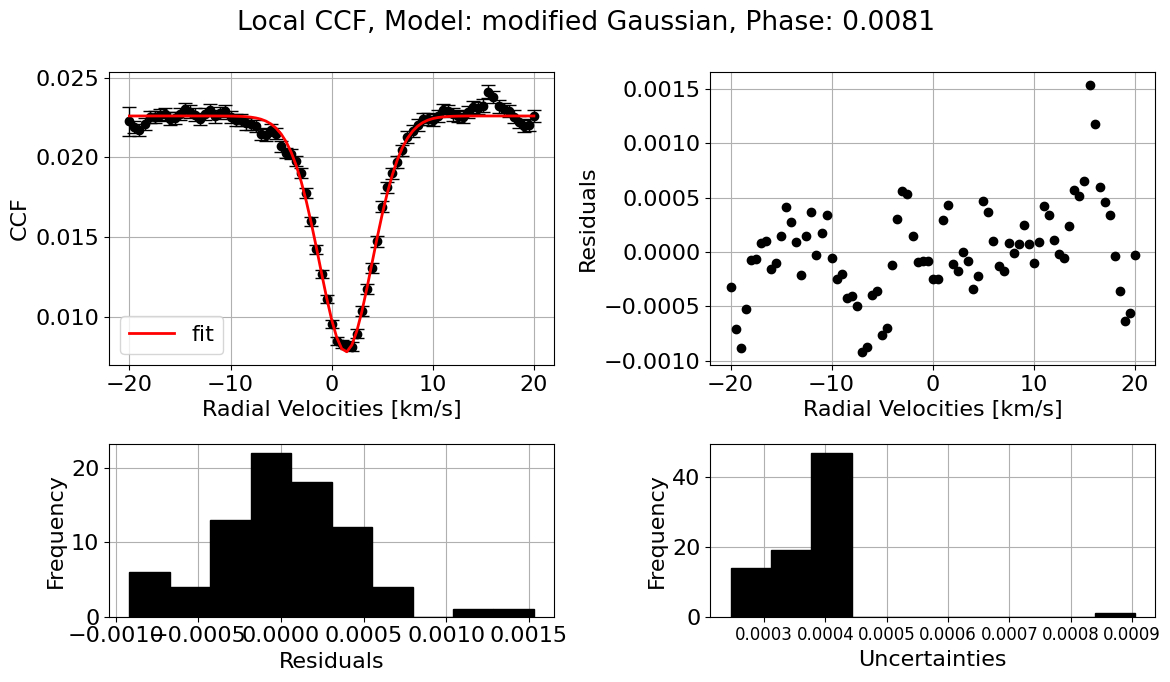

##############################
FITTING modified Gaussian model TO local CCF
Phase: 0.0100
------------------------------
Fit parameters:
y0 = 0.018646 ± 0.000056
x0 = 1.716466 ± 0.031814
sigma = 2.696876 ± 0.060462
a = 0.011920 ± 0.000166
c = 1.845831 ± 0.068711
R^2:  0.9902
------------------------------
CCF parameters:
Central RV [km/s]: 1.716466 ± 0.031814
Continuum: 0.018646 ± 0.000056
Deph [%]: 36.074258 ± 0.910740
Width [km/s]: 2.696876 ± 0.060462


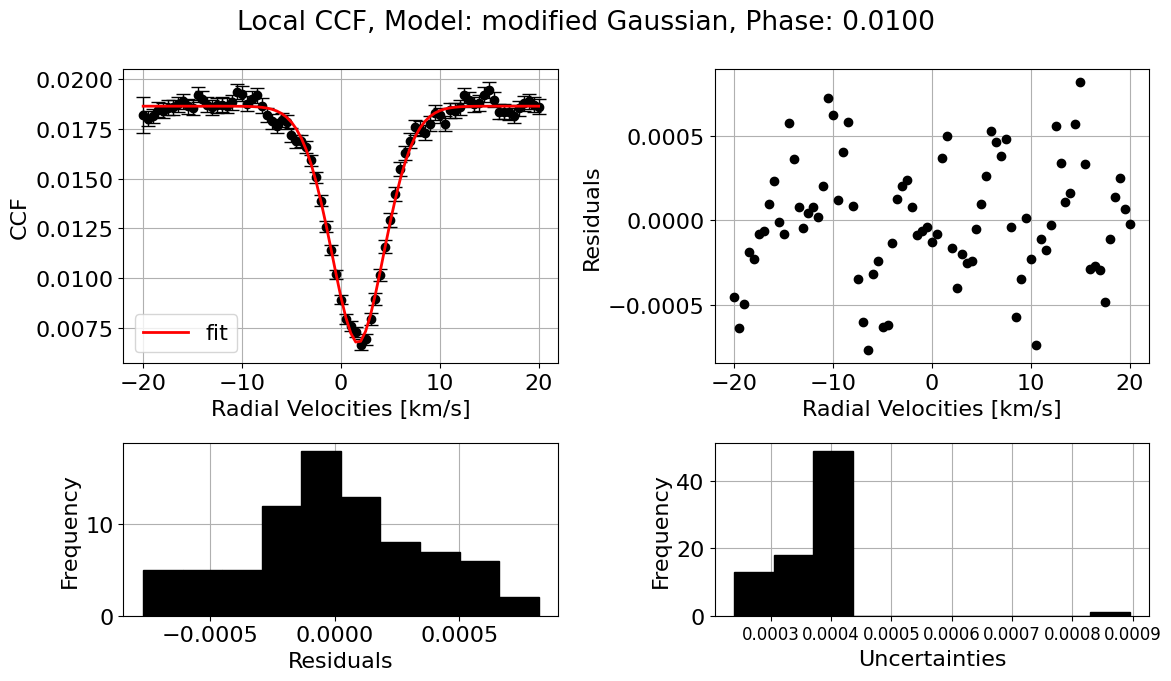

##############################
FITTING modified Gaussian model TO local CCF
Phase: 0.0119
------------------------------
Fit parameters:
y0 = 0.012572 ± 0.000056
x0 = 2.069585 ± 0.048473
sigma = 2.734939 ± 0.090158
a = 0.007885 ± 0.000166
c = 1.918817 ± 0.109023
R^2:  0.9899
------------------------------
CCF parameters:
Central RV [km/s]: 2.069585 ± 0.048473
Continuum: 0.012572 ± 0.000056
Deph [%]: 37.282320 ± 1.346557
Width [km/s]: 2.734939 ± 0.090158


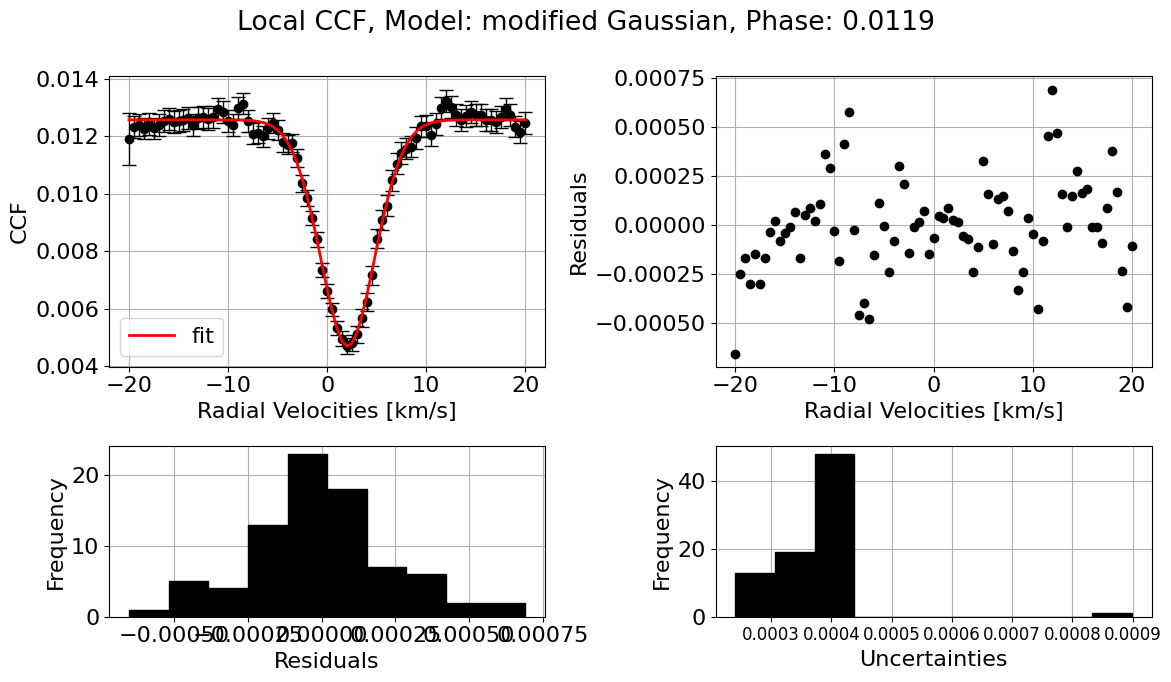

##############################
FITTING modified Gaussian model TO local CCF
Phase: 0.0138
------------------------------
Fit parameters:
y0 = 0.006355 ± 0.000052
x0 = 2.347911 ± 0.090415
sigma = 2.932540 ± 0.152018
a = 0.003862 ± 0.000146
c = 2.445040 ± 0.286021
R^2:  0.9558
------------------------------
CCF parameters:
Central RV [km/s]: 2.347911 ± 0.090415
Continuum: 0.006355 ± 0.000052
Deph [%]: 39.233446 ± 2.355425
Width [km/s]: 2.932540 ± 0.152018


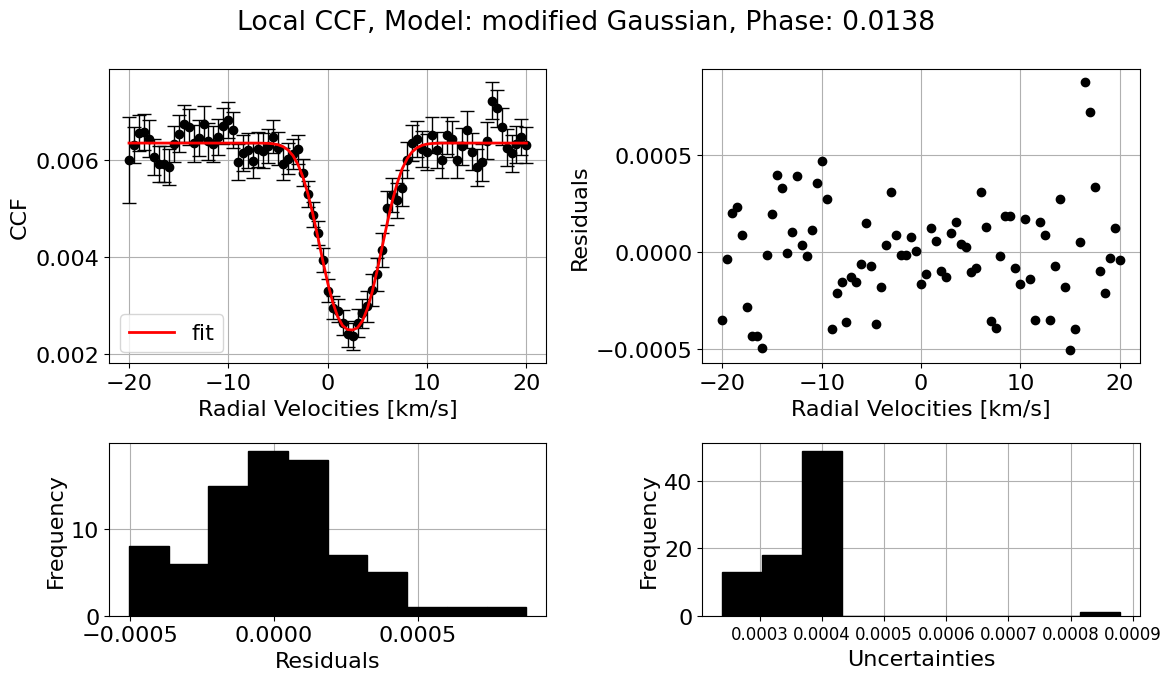

##############################
FITTING modified Gaussian model TO local CCF
Phase: 0.0157
------------------------------
Fit parameters:
y0 = 0.001588 ± 0.000053
x0 = 1.976266 ± 0.313655
sigma = 1.806793 ± 0.659187
a = 0.001032 ± 0.000205
c = 1.506854 ± 0.693656
R^2:  0.3813
------------------------------
CCF parameters:
Central RV [km/s]: 1.976266 ± 0.313655
Continuum: 0.001588 ± 0.000053
Deph [%]: 34.988549 ± 13.110023
Width [km/s]: 1.806793 ± 0.659187


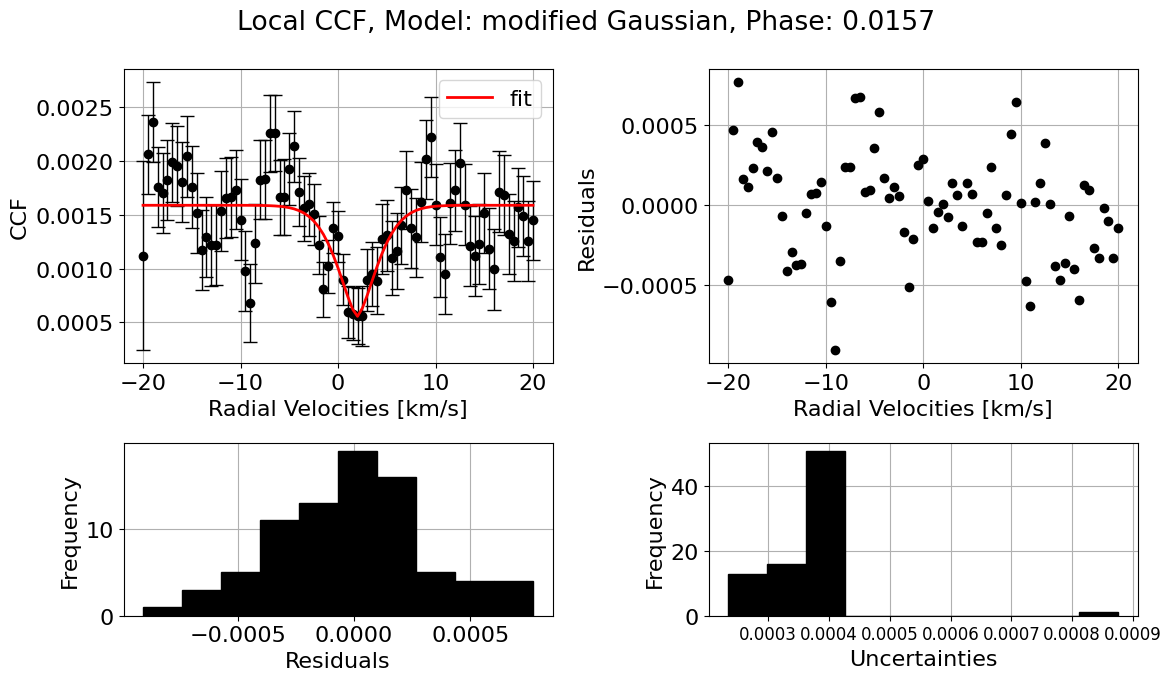

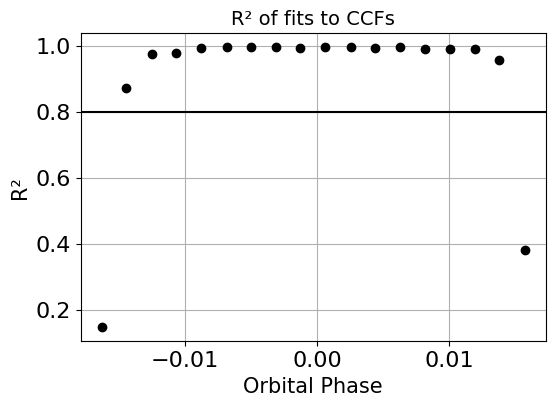

In [11]:
central_rv_array, continuum_array, depth_array, width_array, R2_array = hecate._CCF_parameters(CCFs=local_CCFs, ccf_type="local", model="modified Gaussian", print_output=True, plot_fit=True, save=None)

In [12]:
from utils import get_phase_mu

phase_mu = get_phase_mu(planet_params, time)
phases, tr_dur, tr_ingress_egress, in_indices, out_indices = phase_mu.phases, phase_mu.tr_dur, phase_mu.tr_ingress_egress, phase_mu.in_indices, phase_mu.out_indices
in_phases = phases[np.isin(np.arange(len(phases)), in_indices)]

mu_in = get_phase_mu.mu(in_phases, planet_params)
inner = np.arange(2,len(mu_in)-2)

mu_min = get_phase_mu.mu(tr_dur/2-tr_ingress_egress/2, planet_params)
mu_max = get_phase_mu.mu(0, planet_params)

In [13]:
width_array[:,1][inner]

array([0.11629323, 0.07517183, 0.06326548, 0.0472277 , 0.04186729,
       0.03801473, 0.03882941, 0.03891713, 0.03949819, 0.03787604,
       0.04297287, 0.04762293, 0.06046163, 0.09015753])

In [14]:
coefs_poly_rv, cov_poly_rv = np.polyfit(in_phases[inner], central_rv_array[:,0][inner], w=1/central_rv_array[:,1][inner], deg=1, cov=True)
coefs_poly_width, cov_poly_width = np.polyfit(mu_in[inner], width_array[:,0][inner], w=1/width_array[:,1][inner], deg=1, cov=True)
coefs_poly_depth, cov_poly_depth = np.polyfit(mu_in[inner], depth_array[:,0][inner], w=1/depth_array[:,1][inner], deg=1, cov=True)

coefs_poly_width

array([-0.17043824,  2.7900992 ])

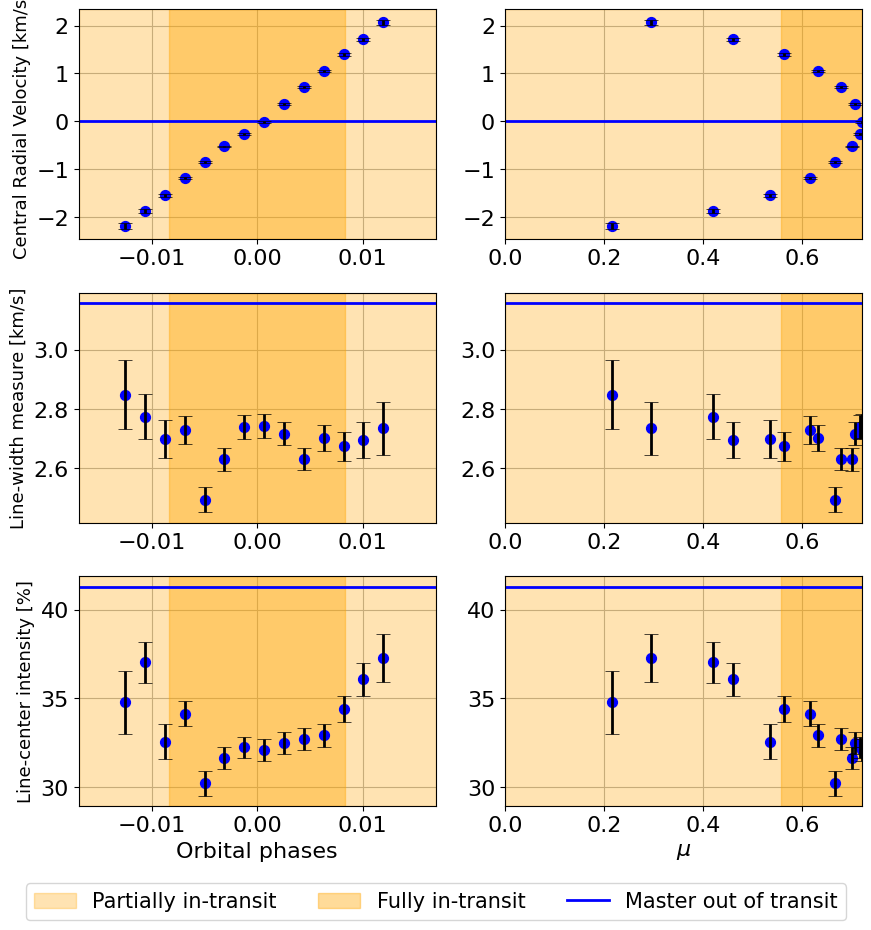

In [15]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9,9))

orb_range = [-tr_dur/2, tr_dur/2]
mu_range = [0, mu_max]

axes[0,0].axvspan(-tr_dur/2, tr_dur/2, alpha=0.3, color='orange')
axes[0,0].axvspan(tr_ingress_egress/2-tr_dur/2, tr_dur/2-tr_ingress_egress/2., alpha=0.4, color='orange')
axes[0,0].axhline(y=master_central_rv_array[:,0], color='blue', linestyle='-', lw=2, zorder=1)
axes[0,0].scatter(in_phases[inner], central_rv_array[:,0][inner],color='blue',s=50)
axes[0,0].errorbar(x=in_phases[inner], y=central_rv_array[:,0][inner], yerr=central_rv_array[:,1][inner], capsize=5, capthick=0.5, color='black', linewidth=0, elinewidth=2)
axes[0,0].set_ylabel('Central Radial Velocity [km/s]', fontsize=13)
axes[0,0].grid()
axes[0,0].set_axisbelow(True)
axes[0,0].set_xlim(orb_range)

axes[0,1].axvspan(0, mu_max, alpha=0.3, color='orange')
axes[0,1].axvspan(mu_min, mu_max, alpha=0.4, color='orange')
axes[0,1].axhline(y=master_central_rv_array[:,0], color='blue', linestyle='-', lw=2, zorder=1)
axes[0,1].scatter(mu_in[inner], central_rv_array[:,0][inner], color='blue', s=50)
axes[0,1].errorbar(x=mu_in[inner], y=central_rv_array[:,0][inner], yerr=central_rv_array[:,1][inner], capsize=5, capthick=0.5, color='black', linewidth=0, elinewidth=2)
axes[0,1].grid()
axes[0,1].set_axisbelow(True)
axes[0,1].set_xlim(mu_range)

axes[1,0].axvspan(-tr_dur/2., tr_dur/2., alpha=0.3, color='orange')
axes[1,0].axvspan(tr_ingress_egress/2-tr_dur/2, tr_dur/2-tr_ingress_egress/2, alpha=0.4, color='orange')
axes[1,0].axhline(y=master_width_array[:,0], color='blue', linestyle='-', lw=2, zorder=1)
axes[1,0].scatter(in_phases[inner], width_array[:,0][inner],color='blue',s=50)
axes[1,0].errorbar(x=in_phases[inner], y=width_array[:,0][inner], yerr=width_array[:,1][inner],capsize=5,capthick=0.5,color='black',linewidth=0,elinewidth=2)
axes[1,0].set_ylabel('Line-width measure [km/s]', fontsize=13)
axes[1,0].grid()
axes[1,0].set_axisbelow(True)
axes[1,0].set_xlim(orb_range)

axes[1,1].axvspan(0, mu_max, alpha=0.3, color='orange')
axes[1,1].axvspan(mu_min, mu_max, alpha=0.4, color='orange')
axes[1,1].axhline(y=master_width_array[:,0], color='blue', linestyle='-', lw=2, zorder=1)
axes[1,1].scatter(mu_in[inner], width_array[:,0][inner],color='blue',s=50)
axes[1,1].errorbar(x=mu_in[inner], y=width_array[:,0][inner], yerr=width_array[:,1][inner], capsize=5,capthick=0.5,color='black',linewidth=0,elinewidth=2)
axes[1,1].grid()
axes[1,1].set_axisbelow(True)
axes[1,1].set_xlim(mu_range)


axes[2,0].axvspan(-tr_dur/2., tr_dur/2., alpha=0.3, color='orange')
axes[2,0].axvspan(tr_ingress_egress/2.-tr_dur/2, tr_dur/2-tr_ingress_egress/2., alpha=0.4, color='orange')
axes[2,0].axhline(y=master_depth_array[:,0], color='blue', linestyle='-', lw=2, zorder=1)
axes[2,0].scatter(in_phases[inner], depth_array[:,0][inner],color='blue',s=50)
axes[2,0].errorbar(x=in_phases[inner], y=depth_array[:,0][inner], yerr=depth_array[:,1][inner],capsize=5,capthick=0.5,color='black',linewidth=0,elinewidth=2)
axes[2,0].set_xlabel('Orbital phases')
axes[2,0].set_ylabel('Line-center intensity [%]', fontsize=13)
axes[2,0].grid()
axes[2,0].set_axisbelow(True)
axes[2,0].set_xlim(orb_range)

l0=axes[2,1].axvspan(0, mu_max, alpha=0.3, color='orange')
l1=axes[2,1].axvspan(mu_min, mu_max, alpha=0.4, color='orange')
l2=axes[2,1].axhline(y=master_depth_array[:,0], color='blue', linestyle='-', lw=2, zorder=1)
axes[2,1].scatter(mu_in[inner], depth_array[:,0][inner], color='blue', s=50)
axes[2,1].errorbar(x=mu_in[inner],y=depth_array[:,0][inner], yerr=depth_array[:,1][inner],capsize=5,capthick=0.5,color='black',linewidth=0,elinewidth=2)
axes[2,1].set_xlabel(r'$\mu$')
axes[2,1].grid()
axes[2,1].set_axisbelow(True)
axes[2,1].set_xlim(mu_range)

#plt.suptitle('Local strong Fe I lines CCFs parameters')

labels = ['Partially in-transit','Fully in-transit','Master out of transit']
fig.legend([l0,l1,l2], labels=labels, loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.05), fontsize=15)
plt.tight_layout()
plt.show()

In [ ]:
from nested_sampling import run_nestedsampler

params_arrays = [central_rv_array, width_array, depth_array]
master_params = [master_central_rv_array, master_width_array, master_depth_array]
ylabels = ['Central Radial Velocity [km/s]', 'Line-width measure [km/s]', 'Line-center intensity [%]']


fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16,11))
orb_range = [-tr_dur/2, tr_dur/2]
mu_range = [0, mu_max]

ph = in_phases[inner]
mu = mu_in[inner]

for i in range(len(ylabels)):

    print("="*30)
    print(ylabels[i])
    print("Orbital phases")
    
    axes[i,0].axvspan(-tr_dur/2, tr_dur/2, alpha=0.3, color='orange')
    axes[i,0].axvspan(tr_ingress_egress/2-tr_dur/2, tr_dur/2-tr_ingress_egress/2., alpha=0.4, color='orange')
    axes[i,0].axhline(y=master_params[i][:,0], color='blue', linestyle='-', lw=2, zorder=1)
    axes[i,0].scatter(ph, params_arrays[i][:,0][inner],color='blue',s=50)
    axes[i,0].errorbar(x=ph, y=params_arrays[i][:,0][inner], yerr=params_arrays[i][:,1][inner], capsize=5, capthick=0.5, color='black', linewidth=0, elinewidth=2)
    axes[i,0].set_ylabel(ylabels[i], fontsize=15)
    axes[i,0].grid()
    axes[i,0].set_axisbelow(True)
    axes[i,0].set_xlim(orb_range)

    if i == 0:
        m_span = 1000; b_span = 10
    elif i == 1:
        m_span = 100; b_span = 100
    elif i == 2:
        m_span = 100; b_span = 100

    linear_fit_ph, model_ph = run_nestedsampler(ph, params_arrays[i][:,0][inner], params_arrays[i][:,1][inner], m_span, b_span, plot=False).results
    if model_ph != "zero":
        y_fit = linear_fit_ph["m"][0]*ph + linear_fit_ph["b"][0]
        axes[i,0].plot(ph, y_fit, color='blue', linestyle='--')
        x_grid = np.linspace(ph.min(), ph.max(), 100)
        y_grid = linear_fit_ph["m"][0] * x_grid + linear_fit_ph["b"][0]
        dy_grid = np.sqrt((x_grid * linear_fit_ph["m"][1])**2 + linear_fit_ph["b"][1]**2)
        axes[i,0].fill_between(x_grid, y_grid - dy_grid, y_grid + dy_grid, color='gray', alpha=0.2, zorder=1)

        residual = params_arrays[i][:,0][inner] - y_fit
        dy_fit = np.sqrt((ph * linear_fit_ph["m"][1])**2 + linear_fit_ph["b"][1]**2)
        residual_err = np.sqrt(params_arrays[i][:,1][inner]**2 + dy_fit**2)
        axes[i,2].axvspan(-tr_dur/2., tr_dur/2., alpha=0.3, color='orange')
        axes[i,2].axvspan(tr_ingress_egress/2.-tr_dur/2, tr_dur/2-tr_ingress_egress/2., alpha=0.4, color='orange')
        axes[i,2].scatter(ph, residual, color='blue', s=50)
        axes[i,2].errorbar(x=ph,y=residual, yerr=residual_err, capsize=5, capthick=0.5, color='black', linewidth=0, elinewidth=2)
        axes[i,2].set_xlabel('Orbital phases')
        axes[i,2].grid()
        axes[i,2].set_axisbelow(True)
        axes[i,2].set_xlim(orb_range)
        axes[i,2].set_ylim([-1.2*np.max(np.abs(residual)),1.2*np.max(np.abs(residual))])
        axes[i,2].axhline(0, lw=1, ls="--", color="black")

    print(r"$\mu$")
    axes[i,1].axvspan(0, mu_max, alpha=0.3, color='orange')
    axes[i,1].axvspan(mu_min, mu_max, alpha=0.4, color='orange')
    axes[i,1].axhline(y=master_params[i][:,0], color='blue', linestyle='-', lw=2, zorder=1)
    axes[i,1].scatter(mu, params_arrays[i][:,0][inner], color='blue', s=50)
    axes[i,1].errorbar(x=mu, y=params_arrays[i][:,0][inner], yerr=params_arrays[i][:,1][inner], capsize=5, capthick=0.5, color='black', linewidth=0, elinewidth=2)
    axes[i,1].grid()
    axes[i,1].set_axisbelow(True)
    axes[i,1].set_xlim(mu_range)

    linear_fit_mu, model_mu = run_nestedsampler(mu, params_arrays[i][:,0][inner], params_arrays[i][:,1][inner], plot=False).results
    if model_mu != "zero" and model_ph == "zero":
        y_fit = linear_fit_mu["m"][0]*mu + linear_fit_mu["b"][0]
        axes[i,1].plot(mu, y_fit, color='blue', linestyle='--')
        x_grid = np.linspace(mu.min(), mu.max(), 100)
        y_grid = linear_fit_mu["m"][0] * x_grid + linear_fit_mu["b"][0]
        dy_grid = np.sqrt((x_grid * linear_fit_mu["m"][1])**2 + linear_fit_mu["b"][1]**2)
        axes[i,1].fill_between(x_grid, y_grid - dy_grid, y_grid + dy_grid, color='gray', alpha=0.2, zorder=1)

        residual = params_arrays[i][:,0][inner] - y_fit
        dy_fit = np.sqrt((mu * linear_fit_mu["m"][1])**2 + linear_fit_mu["b"][1]**2)
        residual_err = np.sqrt(params_arrays[i][:,1][inner]**2 + dy_fit**2)
        axes[i,2].axvspan(0, mu_max, alpha=0.3, color='orange')
        axes[i,2].axvspan(mu_min, mu_max, alpha=0.4, color='orange')
        axes[i,2].scatter(mu, residual, color='blue', s=50)
        axes[i,2].errorbar(x=mu,y=residual, yerr=residual_err, capsize=5, capthick=0.5, color='black', linewidth=0, elinewidth=2)
        axes[i,2].set_xlabel(r'$\mu$')
        axes[i,2].grid()
        axes[i,2].set_axisbelow(True)
        axes[i,2].set_xlim(mu_range)
        axes[i,2].set_ylim([-1.2*np.max(np.abs(residual)),1.2*np.max(np.abs(residual))])
        axes[i,2].axhline(0, lw=1, ls="--", color="black")

    if model_ph == "zero" and model_mu == "zero":
        axes[i,2].axis('off')


labels = ['Partially in-transit','Fully in-transit','Master out of transit']
fig.legend([l0,l1,l2], labels=labels, loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.05), fontsize=15)
plt.tight_layout()
plt.show()

Central Radial Velocity [km/s]
Orbital phases


6379it [00:04, 1302.25it/s, batch: 0 | bound: 13 | nc: 23 | ncall: 122086 | eff(%):  5.204 | loglstar:   -inf < 28.176 <    inf | logz: 14.643 +/-  0.157 | dlogz:  5.141 >  0.010]

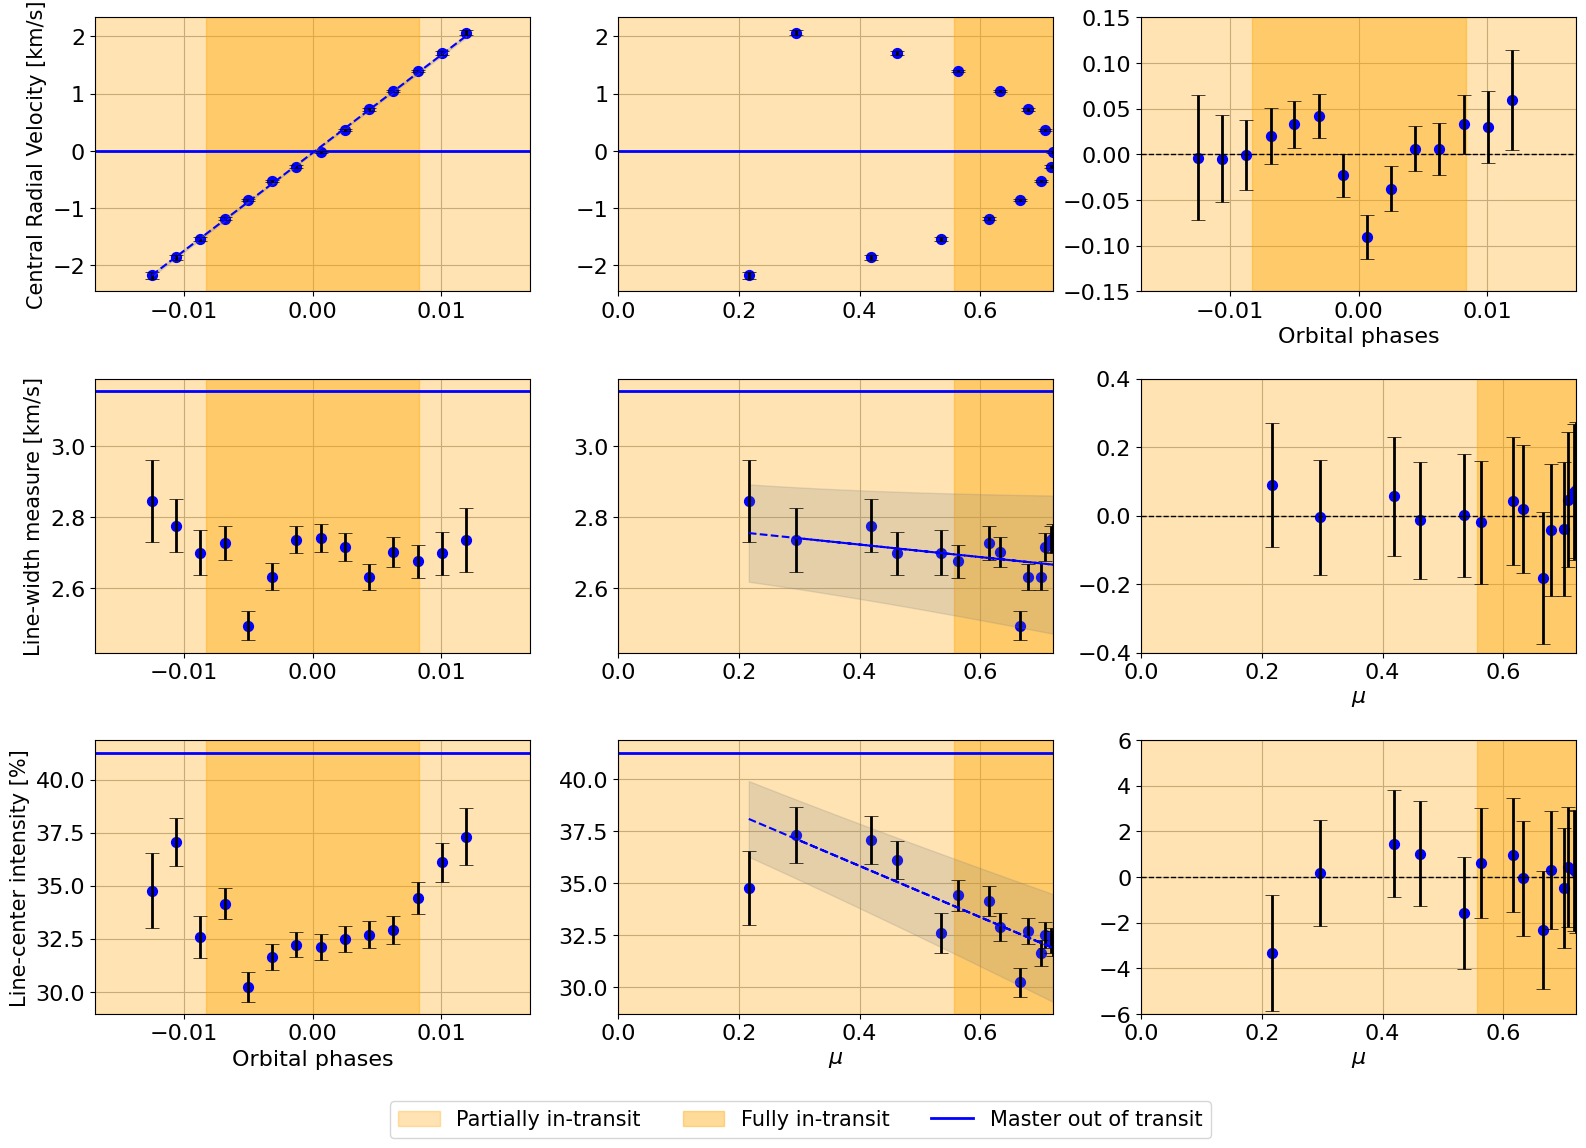

In [100]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16,11))

orb_range = [-tr_dur/2, tr_dur/2]
mu_range = [0, mu_max]

axes[0,0].axvspan(-tr_dur/2, tr_dur/2, alpha=0.3, color='orange')
axes[0,0].axvspan(tr_ingress_egress/2-tr_dur/2, tr_dur/2-tr_ingress_egress/2., alpha=0.4, color='orange')
axes[0,0].axhline(y=master_central_rv_array[:,0], color='blue', linestyle='-', lw=2, zorder=1)
axes[0,0].scatter(in_phases[inner], central_rv_array[:,0][inner],color='blue',s=50)
axes[0,0].errorbar(x=in_phases[inner], y=central_rv_array[:,0][inner], yerr=central_rv_array[:,1][inner], capsize=5, capthick=0.5, color='black', linewidth=0, elinewidth=2)
axes[0,0].plot(in_phases[inner], coefs_poly_rv[0]*in_phases[inner]+coefs_poly_rv[1], color='blue', linestyle='--')
# Confidence band
m, b = coefs_poly_rv
dm, db = np.sqrt(np.diag(cov_poly_rv))
x_grid = np.linspace(in_phases[inner].min(), in_phases[inner].max(), 100)
y_grid = m * x_grid + b
dy_grid = np.sqrt((x_grid * dm)**2 + db**2)
axes[0,0].fill_between(x_grid, y_grid - dy_grid, y_grid + dy_grid, color='gray', alpha=0.2, zorder=1)
axes[0,0].set_ylabel('Central Radial Velocity [km/s]', fontsize=15)
axes[0,0].grid()
axes[0,0].set_axisbelow(True)
axes[0,0].set_xlim(orb_range)

axes[0,1].axvspan(0, mu_max, alpha=0.3, color='orange')
axes[0,1].axvspan(mu_min, mu_max, alpha=0.4, color='orange')
axes[0,1].axhline(y=master_central_rv_array[:,0], color='blue', linestyle='-', lw=2, zorder=1)
axes[0,1].scatter(mu_in[inner], central_rv_array[:,0][inner], color='blue', s=50)
axes[0,1].errorbar(x=mu_in[inner], y=central_rv_array[:,0][inner], yerr=central_rv_array[:,1][inner], capsize=5, capthick=0.5, color='black', linewidth=0, elinewidth=2)
axes[0,1].grid()
axes[0,1].set_axisbelow(True)
axes[0,1].set_xlim(mu_range)

y_fit = m * in_phases[inner] + b
residual = central_rv_array[:,0][inner]-y_fit
dy_fit = np.sqrt((in_phases[inner] * dm)**2 + db**2)
residual_err = np.sqrt(central_rv_array[:,1][inner]**2 + dy_fit**2)
axes[0,2].axvspan(-tr_dur/2., tr_dur/2., alpha=0.3, color='orange')
axes[0,2].axvspan(tr_ingress_egress/2.-tr_dur/2, tr_dur/2-tr_ingress_egress/2., alpha=0.4, color='orange')
axes[0,2].scatter(in_phases[inner], residual, color='blue', s=50)
axes[0,2].errorbar(x=in_phases[inner],y=residual, yerr=residual_err, capsize=5, capthick=0.5, color='black', linewidth=0, elinewidth=2)
axes[0,2].set_xlabel('Orbital phases')
axes[0,2].grid()
axes[0,2].set_axisbelow(True)
axes[0,2].set_xlim(orb_range)
axes[0,2].set_ylim([-0.15,0.15])
axes[0,2].axhline(0, lw=1, ls="--", color="black")



axes[1,0].axvspan(-tr_dur/2., tr_dur/2., alpha=0.3, color='orange')
axes[1,0].axvspan(tr_ingress_egress/2-tr_dur/2, tr_dur/2-tr_ingress_egress/2, alpha=0.4, color='orange')
axes[1,0].axhline(y=master_width_array[:,0], color='blue', linestyle='-', lw=2, zorder=1)
axes[1,0].scatter(in_phases[inner], width_array[:,0][inner],color='blue',s=50)
axes[1,0].errorbar(x=in_phases[inner], y=width_array[:,0][inner], yerr=width_array[:,1][inner],capsize=5,capthick=0.5,color='black',linewidth=0,elinewidth=2)
axes[1,0].set_ylabel('Line-width measure [km/s]', fontsize=15)
axes[1,0].grid()
axes[1,0].set_axisbelow(True)
axes[1,0].set_xlim(orb_range)

axes[1,1].axvspan(0, mu_max, alpha=0.3, color='orange')
axes[1,1].axvspan(mu_min, mu_max, alpha=0.4, color='orange')
axes[1,1].axhline(y=master_width_array[:,0], color='blue', linestyle='-', lw=2, zorder=1)
axes[1,1].scatter(mu_in[inner], width_array[:,0][inner],color='blue',s=50)
axes[1,1].errorbar(x=mu_in[inner], y=width_array[:,0][inner], yerr=width_array[:,1][inner], capsize=5,capthick=0.5,color='black',linewidth=0,elinewidth=2)
axes[1,1].plot(mu_in[inner], coefs_poly_width[0]*mu_in[inner]+coefs_poly_width[1], color='blue', linestyle='--')
# Confidence band
m, b = coefs_poly_width
dm, db = np.sqrt(np.diag(cov_poly_width))
x_grid = np.linspace(mu_in[inner].min(), mu_in[inner].max(), 100)
y_grid = m * x_grid + b
dy_grid = np.sqrt((x_grid * dm)**2 + db**2)
axes[1,1].fill_between(x_grid, y_grid - dy_grid, y_grid + dy_grid, color='gray', alpha=0.2, zorder=1)
axes[1,1].grid()
axes[1,1].set_axisbelow(True)
axes[1,1].set_xlim(mu_range)

y_fit = m * mu_in[inner] + b
residual = width_array[:,0][inner]-y_fit
dy_fit = np.sqrt((mu_in[inner] * dm)**2 + db**2)
residual_err = np.sqrt(width_array[:,1][inner]**2 + dy_fit**2)
axes[1,2].axvspan(0, mu_max, alpha=0.3, color='orange')
axes[1,2].axvspan(mu_min, mu_max, alpha=0.4, color='orange')
axes[1,2].scatter(mu_in[inner], residual, color='blue', s=50)
axes[1,2].errorbar(x=mu_in[inner],y=residual, yerr=residual_err, capsize=5, capthick=0.5, color='black', linewidth=0, elinewidth=2)
axes[1,2].set_xlabel(r'$\mu$')
axes[1,2].grid()
axes[1,2].set_axisbelow(True)
axes[1,2].set_xlim(mu_range)
axes[1,2].set_ylim([-0.4,0.4])
axes[1,2].axhline(0, lw=1, ls="--", color="black")


axes[2,0].axvspan(-tr_dur/2., tr_dur/2., alpha=0.3, color='orange')
axes[2,0].axvspan(tr_ingress_egress/2.-tr_dur/2, tr_dur/2-tr_ingress_egress/2., alpha=0.4, color='orange')
axes[2,0].axhline(y=master_depth_array[:,0], color='blue', linestyle='-', lw=2, zorder=1)
axes[2,0].scatter(in_phases[inner], depth_array[:,0][inner],color='blue',s=50)
axes[2,0].errorbar(x=in_phases[inner], y=depth_array[:,0][inner], yerr=depth_array[:,1][inner],capsize=5,capthick=0.5,color='black',linewidth=0,elinewidth=2)
axes[2,0].set_xlabel('Orbital phases')
axes[2,0].set_ylabel('Line-center intensity [%]', fontsize=15)
axes[2,0].grid()
axes[2,0].set_axisbelow(True)
axes[2,0].set_xlim(orb_range)

l0=axes[2,1].axvspan(0, mu_max, alpha=0.3, color='orange')
l1=axes[2,1].axvspan(mu_min, mu_max, alpha=0.4, color='orange')
l2=axes[2,1].axhline(y=master_depth_array[:,0], color='blue', linestyle='-', lw=2, zorder=1)
axes[2,1].scatter(mu_in[inner], depth_array[:,0][inner], color='blue', s=50)
axes[2,1].errorbar(x=mu_in[inner],y=depth_array[:,0][inner], yerr=depth_array[:,1][inner],capsize=5,capthick=0.5,color='black',linewidth=0,elinewidth=2)
axes[2,1].plot(mu_in[inner], coefs_poly_depth[0]*mu_in[inner]+coefs_poly_depth[1], color='blue', linestyle='--')
# Confidence band
m, b = coefs_poly_depth
dm, db = np.sqrt(np.diag(cov_poly_depth))
x_grid = np.linspace(mu_in[inner].min(), mu_in[inner].max(), 100)
y_grid = m * x_grid + b
dy_grid = np.sqrt((x_grid * dm)**2 + db**2)
axes[2,1].fill_between(x_grid, y_grid - dy_grid, y_grid + dy_grid, color='gray', alpha=0.2, zorder=1)
axes[2,1].set_xlabel(r'$\mu$')
axes[2,1].grid()
axes[2,1].set_axisbelow(True)
axes[2,1].set_xlim(mu_range)

y_fit = m * mu_in[inner] + b
residual = depth_array[:,0][inner]-y_fit
dy_fit = np.sqrt((mu_in[inner] * dm)**2 + db**2)
residual_err = np.sqrt(depth_array[:,1][inner]**2 + dy_fit**2)
axes[2,2].axvspan(0, mu_max, alpha=0.3, color='orange')
axes[2,2].axvspan(mu_min, mu_max, alpha=0.4, color='orange')
axes[2,2].scatter(mu_in[inner], residual, color='blue', s=50)
axes[2,2].errorbar(x=mu_in[inner],y=residual, yerr=residual_err, capsize=5, capthick=0.5, color='black', linewidth=0, elinewidth=2)
axes[2,2].set_xlabel(r'$\mu$')
axes[2,2].grid()
axes[2,2].set_axisbelow(True)
axes[2,2].set_xlim(mu_range)
axes[2,2].set_ylim([-6,6])
axes[2,2].axhline(0, lw=1, ls="--", color="black")

#plt.suptitle('Local strong Fe I lines CCFs parameters')

labels = ['Partially in-transit','Fully in-transit','Master out of transit']
fig.legend([l0,l1,l2], labels=labels, loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.05), fontsize=15)
plt.tight_layout()
plt.show()

# Weak Fe I lines

In [13]:
mask = np.array([4551.6499, 5539.2824, 6165.3641,
4593.5268, 5552.6919, 6226.7403, 4657.5879, 5568.8689, 6311.5050,
4658.2976, 5607.6668, 6315.8164, 4672.8364, 5611.3587, 6380.7483,
4726.1396, 5618.6360, 6385.7206, 4785.9583, 5635.8247, 6392.5429,
4794.3571, 5636.6992, 6436.4102, 4799.4092, 5646.6854, 6496.4738,
4802.5216, 5651.4716, 6574.2325, 4808.1509, 5652.3194, 6581.2143,
4809.9400, 5661.3480, 6608.0301, 5213.8071, 5677.6875, 6627.5488,
5223.1851, 5680.2441, 6646.9355, 5236.2039, 5720.8950, 6703.5720,
5293.9609, 5793.9178, 6710.3213, 5294.5493, 5807.7868, 6737.9830,
5358.1168, 5811.9172, 6739.5243, 5386.3345, 5814.8092, 6745.9626,
5395.2187, 5827.8794, 6746.9508, 5417.0405, 5835.1018, 6752.7107,
5460.8762, 5852.2222, 6793.2656, 5461.5530, 5858.7840, 6806.8491,
5464.2825, 5861.1123, 6820.3730, 5470.0957, 5881.2822, 6828.5976,
5487.1489, 5902.4755, 6839.8340, 5491.8346, 5929.6802, 6841.3450,
5493.5012, 6034.0365, 6843.6606, 5522.4491, 6082.7147])

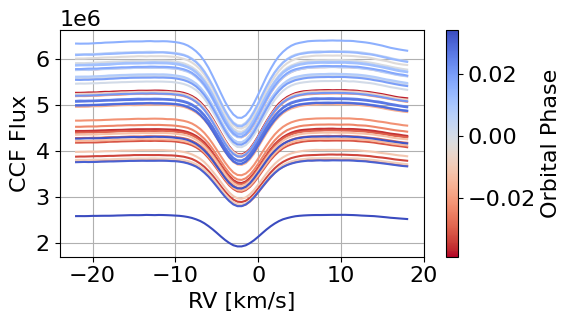

In [15]:
from build_CCF import build_CCF

RV_reference = np.arange(-22,18.5,0.5)

CCFs_weak_iron = build_CCF(time, planet_params, spectra, RV_reference, mask, berv, bervmax, plot=True).CCFs

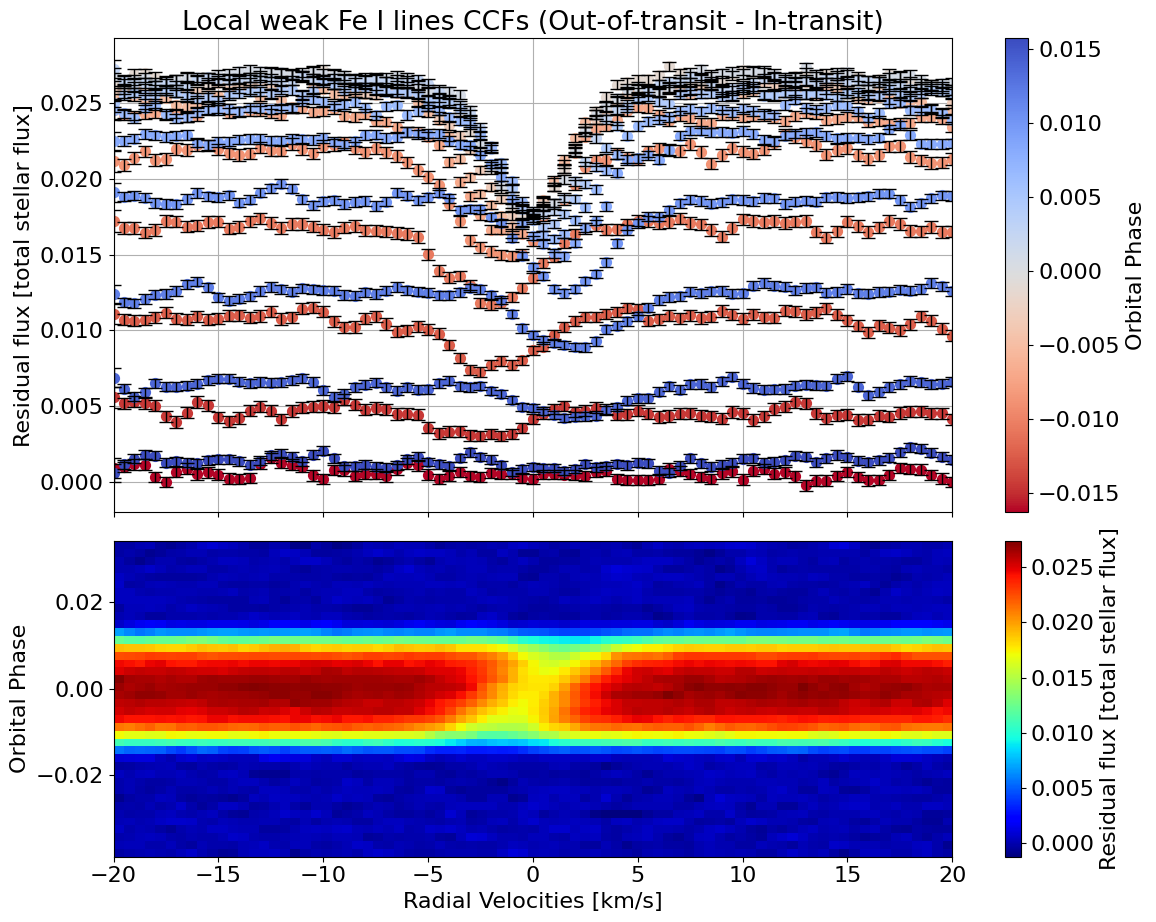

In [16]:
RV_reference = np.arange(-20,20.5,0.5)

ccf_type = "weak Fe I lines"
plot = {"SOAP":False, "fits_initial_CCF":False, "RM":False, "avg_out_of_transit_CCF":False, "local_CCFs":True}

HECATE._extract_local_CCF(planet_params, stellar_params, RV_reference, time, CCFs_weak_iron, ccf_type, plot, save=None)